In [227]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
series = pd.read_csv('final_data2.csv', header = 0, index_col = 0, parse_dates = True)
ump_list = pd.read_csv('ump_avg_bcr.csv',header = 0, index_col = 0)
df = series.dropna()

In [228]:
# Modify Data

# Odds
df.loc[df['c_home_money'] > 0, 'home_odds'] =  (100/(df['c_home_money'] + 100))**(-1)
df.loc[df['c_home_money'] <= 0, 'home_odds'] =  (df['c_home_money']/(df['c_home_money'] - 100))**(-1)
df.loc[df['c_away_money'] > 0, 'away_odds'] =  (100/(df['c_away_money'] + 100))**(-1)
df.loc[df['c_away_money'] <= 0, 'away_odds'] =  (df['c_away_money']/(df['c_away_money'] - 100))**(-1)

# Spreads
df['odds_spread'] = abs(df['home_odds'] - df['away_odds'])
df['score_spread'] = abs(df['home_score'] - df['away_score'])

# Max odds
df.loc[df['home_odds'] >= df['home_odds'],'max_odds'] = df['home_odds']
df.loc[df['home_odds'] < df['away_odds'],'max_odds'] = df['away_odds']

# Underdog Win 
df.loc[(df['home_odds'] > df['away_odds']) & (df['odds_spread'] >= 0.4) & (df['home_score'] > df['away_score']),'uw'] = True
df.loc[(df['home_odds'] < df['away_odds']) & (df['odds_spread'] >= 0.4) & (df['home_score'] < df['away_score']),'uw'] = True
df.fillna(False,inplace =  True)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [229]:
# Create Seasonal Dataset
df_10 = df.loc[(pd.to_datetime(df['date_x']) >= '2010-01-01') & (pd.to_datetime(df['date_x']) <= '2010-12-31') & (df['book'] == 'Pinnacle')]
df_11 = df.loc[(pd.to_datetime(df['date_x']) >= '2011-01-01') & (pd.to_datetime(df['date_x']) <= '2011-12-31') & (df['book'] == 'Pinnacle')]
df_12 = df.loc[(pd.to_datetime(df['date_x']) >= '2012-01-01') & (pd.to_datetime(df['date_x']) <= '2012-12-31') & (df['book'] == 'Pinnacle')]
df_13 = df.loc[(pd.to_datetime(df['date_x']) >= '2013-01-01') & (pd.to_datetime(df['date_x']) <= '2013-12-31') & (df['book'] == 'Pinnacle')]
df_14 = df.loc[(pd.to_datetime(df['date_x']) >= '2014-01-01') & (pd.to_datetime(df['date_x']) <= '2014-12-31') & (df['book'] == 'Pinnacle')]
df_15 = df.loc[(pd.to_datetime(df['date_x']) >= '2015-01-01') & (pd.to_datetime(df['date_x']) <= '2015-12-31') & (df['book'] == 'Pinnacle')]
df_16 = df.loc[(pd.to_datetime(df['date_x']) >= '2016-01-01') & (pd.to_datetime(df['date_x']) <= '2016-12-31') & (df['book'] == 'Pinnacle')]
df_17 = df.loc[(pd.to_datetime(df['date_x']) >= '2017-01-01') & (pd.to_datetime(df['date_x']) <= '2017-12-31') & (df['book'] == 'Pinnacle')]
df_18 = df.loc[(pd.to_datetime(df['date_x']) >= '2018-01-01') & (pd.to_datetime(df['date_x']) <= '2018-12-31') & (df['book'] == 'Pinnacle')]

Text(0.5, 1.0, 'score spread vs frequency')

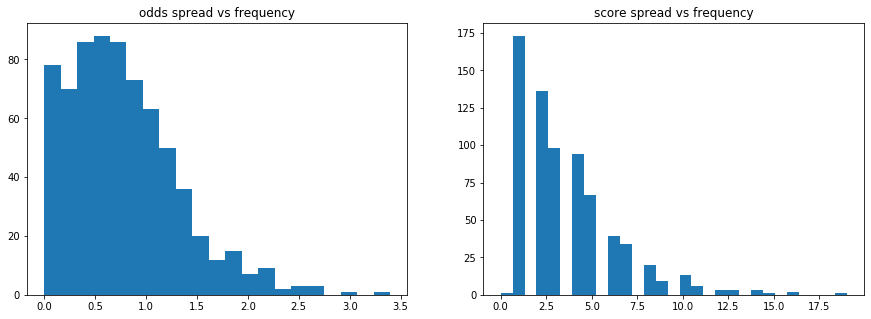

In [37]:
# BOS 2010-2018 Spread Graphs
df_BOS = df[['date_x','ump','total_call','bad_call','bad_call_ratio','away_team','away_score',
                  'home_score','home_team','c_away_money','c_home_money','odds_spread',
             'score_spread','book','uw']].loc[(df['home_team'] == 'Boston Red Sox') & 
                                         (df['book'] == 'Pinnacle')]

fig0, axs0 = plt.subplots(1, 2, figsize = (15, 5), sharey = False)
axs0[0].hist(df_BOS['odds_spread'],bins = 'auto')
axs0[0].set_title('odds spread vs frequency')
axs0[1].hist(df_BOS['score_spread'],bins = 'auto')
axs0[1].set_title('score spread vs frequency')


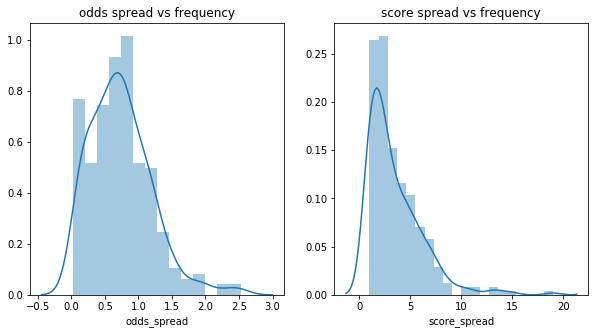

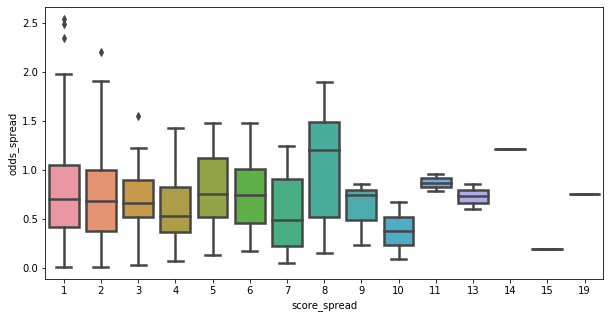

In [36]:
# BOS 2010-2018 Underdog Win
df_BOS_uw = df[['date_x','ump','total_call','bad_call','bad_call_ratio','away_team','away_score',
                  'home_score','home_team','c_away_money','c_home_money','odds_spread',
             'score_spread','book','uw']].loc[(df['home_team'] == 'Boston Red Sox') & 
                                         (df['book'] == 'Pinnacle') & (df['uw'] == True)]

fig,ax = plt.subplots(1,2,figsize = (10,5),sharey = False)
ax[0].set_title('odds spread vs frequency')
ax[1].set_title('score spread vs frequency')
sns.distplot(df_BOS_uw['odds_spread'],kde = True,ax = ax[0])
sns.distplot(df_BOS_uw['score_spread'],kde = True,ax = ax[1])

# score spread vs odds spread
# Box plot
fig1,ax1 = plt.subplots(figsize = (10,5))
ax1 = sns.boxplot(x = 'score_spread', y = 'odds_spread', data = df_BOS_uw, linewidth=2.5)

There are 27 games involved with BOS in 2010 season that underdogs win.


//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


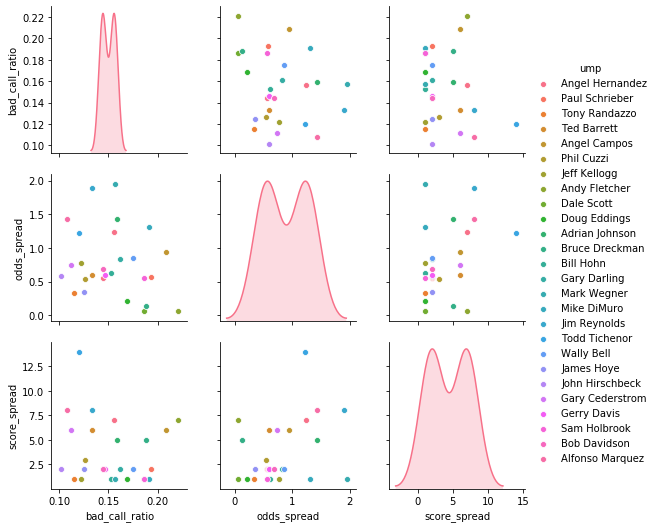

In [35]:
# BOS 2010 Underdog Win
df_BOS_uw_10 = df_BOS_uw[['date_x','ump','total_call','bad_call','bad_call_ratio','away_team','away_score',
                  'home_score','home_team','c_away_money','c_home_money','odds_spread',
             'score_spread','book','uw']].loc[(pd.to_datetime(df_BOS_uw['date_x']) <= '2010-12-31') & 
                                             (pd.to_datetime(df_BOS_uw['date_x']) >= '2010-01-01')]
print('There are %d games involved with BOS in 2010 season that underdogs win.'% len(df_BOS_uw_10))
sns.pairplot(df_BOS_uw_10[['ump','bad_call_ratio','odds_spread','score_spread']], hue = 'ump')

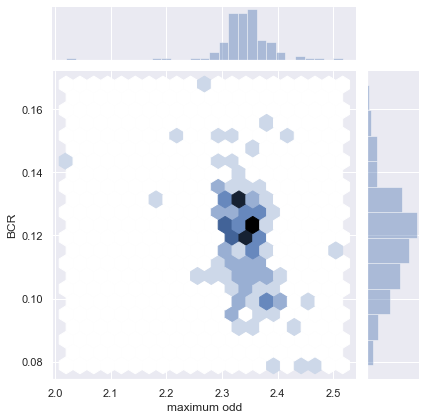

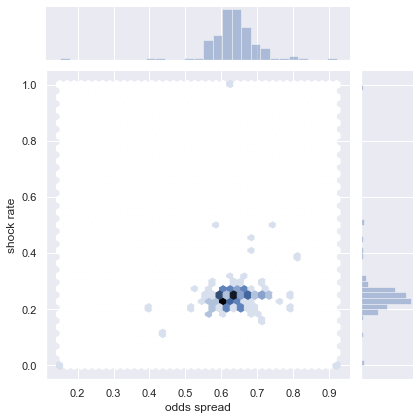

In [185]:
# Compute the Shock Rate for ump in 2010 - 2018 season in which underdog wins
uw = pd.DataFrame()
total_game = df.groupby('ump')['date_x'].count()
total_uw = df.loc[df['uw']== True].groupby('ump')['date_x'].count()
avg_odds_spread = df.groupby('ump')['odds_spread'].mean()
avg_bcr = df.groupby('ump')['bad_call_ratio'].mean()
max_odds = df.groupby('ump')['max_odds'].mean()
#g1.to_frame().sort_values('bad_call_ratio')

uw['total_game'] = total_game
uw['uw_game'] = total_uw
uw['sr'] = uw['uw_game']/uw['total_game']
uw['bcr'] = avg_bcr
uw['odds_spread'] = avg_odds_spread
uw['max_odds'] = max_odds
uw.fillna(0,inplace = True)

sns.jointplot(x = 'max_odds',y = 'bcr',data = uw,kind = 'hex').set_axis_labels('maximum odd', 'BCR')
# plt.savefig('max odds vs shock rate.pdf')
sns.jointplot(x = 'odds_spread', y = 'sr',data = uw,kind = 'hex').set_axis_labels('odds spread', 'shock rate')
# plt.savefig('odds spread vs shock rate.pdf')

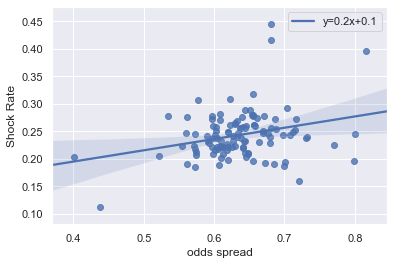

                            OLS Regression Results                            
Dep. Variable:                     sr   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     9.557
Date:                Sat, 07 Mar 2020   Prob (F-statistic):            0.00252
Time:                        17:34:44   Log-Likelihood:                 197.57
No. Observations:                 112   AIC:                            -391.1
Df Residuals:                     110   BIC:                            -385.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1130      0.042      2.669      

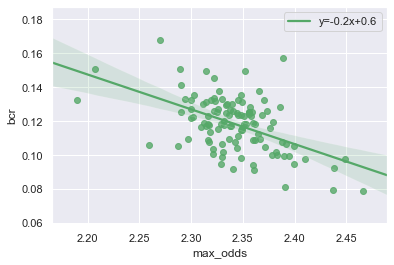

                            OLS Regression Results                            
Dep. Variable:                    bcr   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     38.91
Date:                Sat, 07 Mar 2020   Prob (F-statistic):           8.47e-09
Time:                        17:34:44   Log-Likelihood:                 320.53
No. Observations:                 112   AIC:                            -637.1
Df Residuals:                     110   BIC:                            -631.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5984      0.077      7.776      0.0

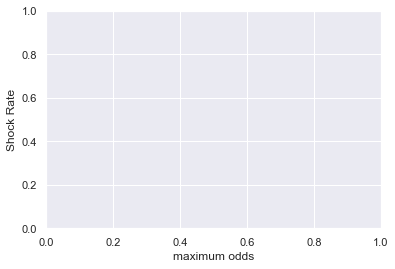

In [187]:
uw_cutoff  = uw.loc[(uw['sr'] < 0.5) & (uw['sr'] > 0)]

# sr vs odds_spread
slope, intercept, r_value, p_value, std_err = stats.linregress(uw_cutoff['odds_spread'],uw_cutoff['sr'])
ax = sns.regplot(x = 'odds_spread', y= 'sr', data=uw_cutoff, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.xlabel('odds spread')
plt.ylabel('Shock Rate')
plt.show()
#plt.savefig('odds spread vs shock rate regression plot.pdf')
model_1 = ols('sr ~ odds_spread', uw_cutoff).fit()
print(model_1.summary())

# bcr vs max_odds
slope, intercept, r_value, p_value, std_err = stats.linregress(uw_cutoff['max_odds'],uw_cutoff['bcr'])
ax = sns.regplot(x = 'max_odds', y= 'bcr', data=uw_cutoff, color='g', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()
plt.xlabel('maximum odds')
plt.ylabel('Shock Rate')
# plt.savefig('maximum odds vs BCR regression plot.pdf')
model_2 = ols('bcr ~ max_odds', uw_cutoff).fit()
print(model_2.summary())

# sr vs odds_spread + max_odds
model_3 = ols('sr ~ max_odds', uw_cutoff).fit()
print(model_3.summary())

In [188]:
# Compute the Shock Rate for Home Teams in 2010 - 2018 season in which home team is underdog and wins
ht = pd.DataFrame()
total_game = df.groupby('home_team')['date_x'].count()
total_ht = df.loc[(df['uw']==True)&(df['home_score'] > df['away_score'])].groupby('home_team')['date_x'].count()
avg_odds_spread = df.loc[(df['uw']==True)&(df['home_score'] > df['away_score'])].groupby('home_team')['odds_spread'].mean()
avg_bcr = df.loc[(df['uw']==True)&(df['home_score'] > df['away_score'])].groupby('home_team')['bad_call_ratio'].mean()
max_odds = df.loc[(df['uw']==True)&(df['home_score'] > df['away_score'])].groupby('home_team')['max_odds'].mean()
#g1.to_frame().sort_values('bad_call_ratio')

ht['total_game'] = total_game
ht['uw_game'] = total_ht
ht['sr'] = ht['uw_game']/ht['total_game']
ht['bcr'] = avg_bcr
ht['odds_spread'] = avg_odds_spread
ht['max_odds'] = max_odds
ht.fillna(0,inplace = True)


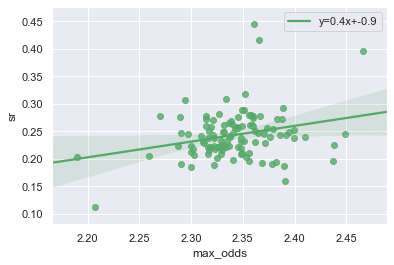

                            OLS Regression Results                            
Dep. Variable:            odds_spread   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                   0.03865
Date:                Sat, 07 Mar 2020   Prob (F-statistic):              0.846
Time:                        17:35:16   Log-Likelihood:                 39.774
No. Observations:                  30   AIC:                            -75.55
Df Residuals:                      28   BIC:                            -72.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7640      0.140      5.453      0.0

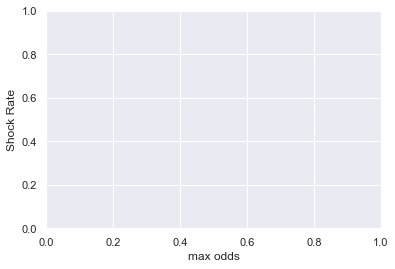

In [189]:
slope, intercept, r_value, p_value, std_err = stats.linregress(ht['max_odds'],ht['sr'])
ax = sns.regplot(x = 'max_odds', y= 'sr', data=uw_cutoff, color='g', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()
plt.xlabel('max odds')
plt.ylabel('Shock Rate')
model = ols('odds_spread ~ bcr', ht).fit()
print(model.summary())

In [338]:
# Extract the rank X BCR value

def get_ump_list(start,end):
    
    # Get ump list according to BCR rank start to end 
    
    l = []

    for i in range(start,end + 1):
    
        l.append(find_ump(i)[1])
    
    return l
    
def find_ump(rank):
    
    bcr = ump_list.nlargest(rank,'bad_call_ratio').iloc[-1]['bad_call_ratio']
    
    ump = ump_list.nlargest(rank,'bad_call_ratio').iloc[-1]['ump.1']
    
    return [bcr,ump]

def get_season_sr(ump,data):
    
    # Data input is seasonal data, filter by specific umpire
    # Return shock rate, seasonal average bcr, seasonal underdog win average bcr
    
    d = data.loc[data['ump'] == ump]
    total_game = d['date_x'].count()
    total_uw = d[d['uw'] == True]['uw'].count()
    sea_bcr = d['bad_call_ratio'].mean()
    bcr_uw = d.loc[d['uw'] == True]['bad_call_ratio'].mean()
    sr = total_uw/total_game
    
    return [sr,sea_bcr,bcr_uw]

def time_plot(ump): # Plot time series with respect to SR and BCR
    
    data_list = [df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18]
    years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018']
    list_sea = []
    list_sr = []
    list_sea_bcr = []
    list_uw_bcr = []
    
    for i in range(len(data_list)):
        
        data = data_list[i]
        
        if data[data['ump'] == ump].shape[0] != 0:
            
            list_sea.append(years[i])
            list_sr.append(get_season_sr(ump,data)[0])
            list_sea_bcr.append(get_season_sr(ump,data)[1])
            list_uw_bcr.append(get_season_sr(ump,data)[2])
            
            i += 1
            
        else:
            
            i += 1
        
    dict = {'season':list_sea,'sr':list_sr,'sea_bcr':list_sea_bcr,'sea_uw_bcr':list_uw_bcr}  
    
    x = pd.DataFrame(dict)
    x.fillna(0,inplace = True)
  
    #plt.figure(figsize = (10,5))
    sns.set(style = 'ticks')
    fig,ax = plt.subplots(1,2,figsize = (15,5),sharey = False)
    # Draw line plot of size and total_bill with parameters and hue "day"
    sns.lineplot(x = 'season', y = 'sr', data = x,label = 'Shock rate',ax = ax[0])
    sns.lineplot(x = 'season', y = 'sea_bcr', data = x, label = 'Avg BCR',ax = ax[1])
    sns.lineplot(x = 'season', y = 'sea_uw_bcr', data = x,label = 'Underdog BCR',ax = ax[1])
    plt.title(ump, fontsize = 20)
    plt.xlabel('Season', fontsize = 15)
    plt.ylabel('Rate', fontsize = 15)
    plt.show()
    
def plot_ump(rank1,rank2):
    
    l = get_ump_list(rank1,rank2)
    
    for umpire in l:
        
        time_plot(umpire)


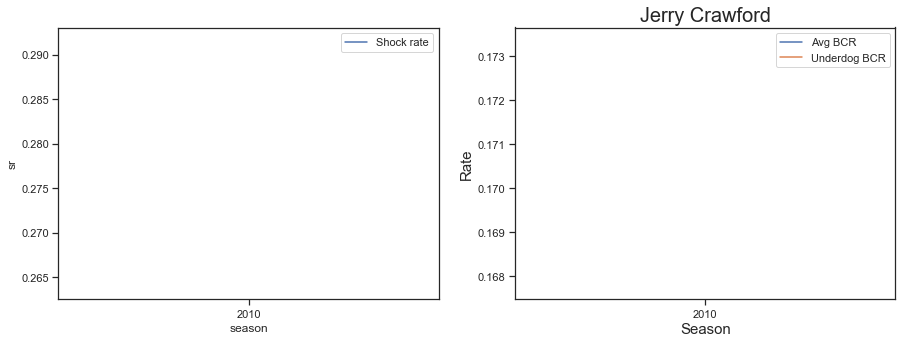

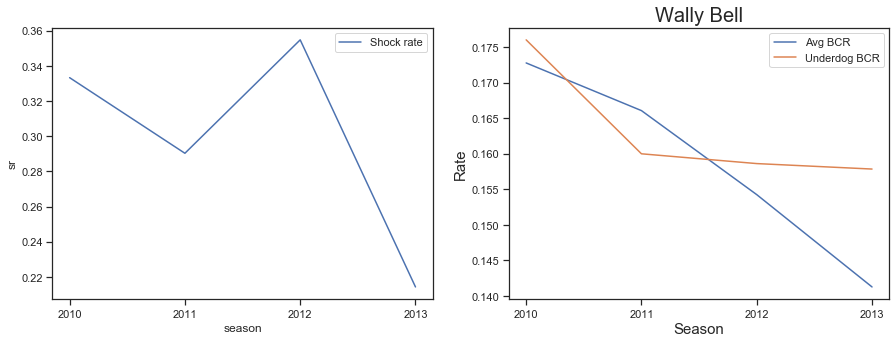

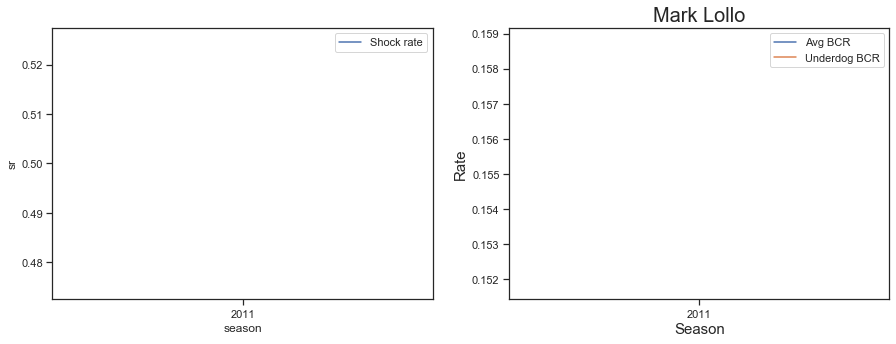

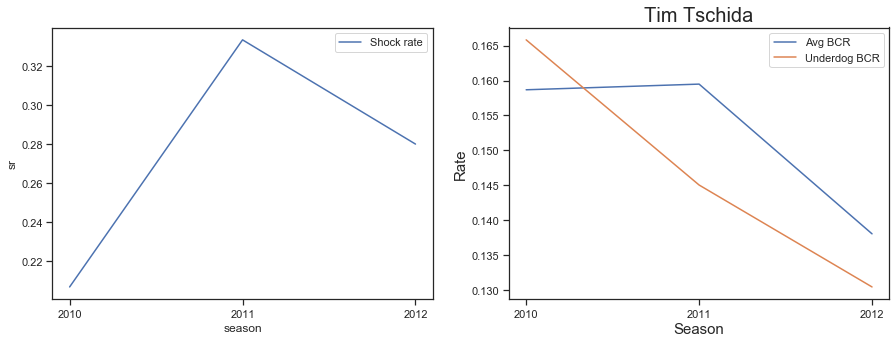

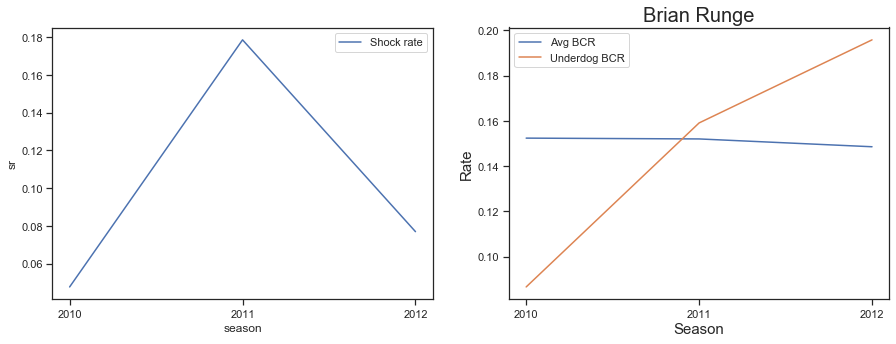

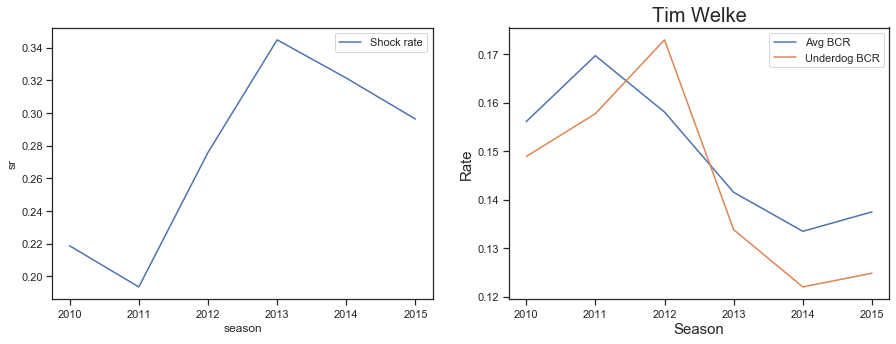

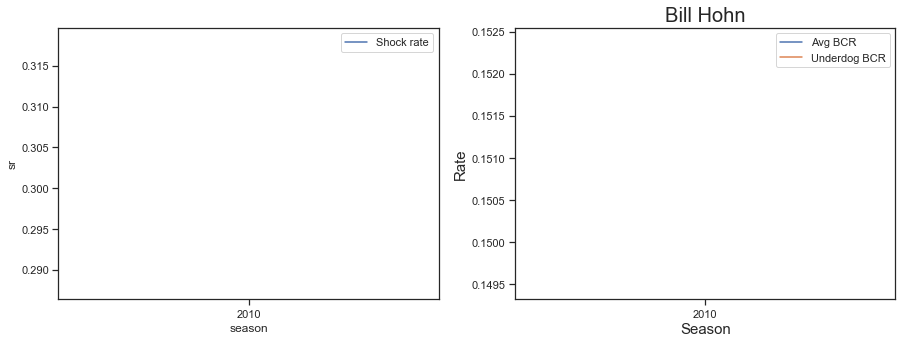

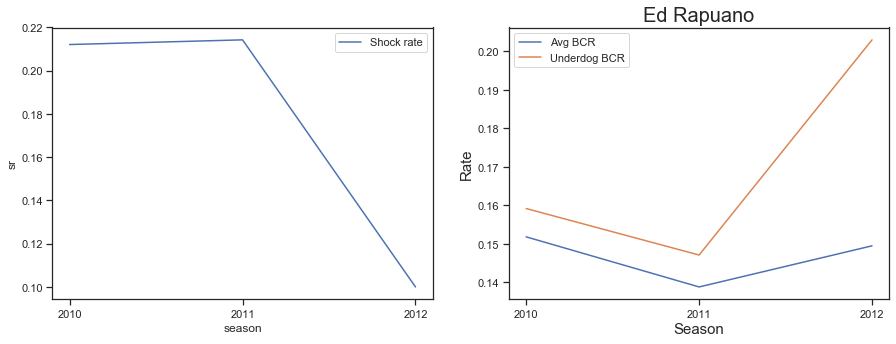

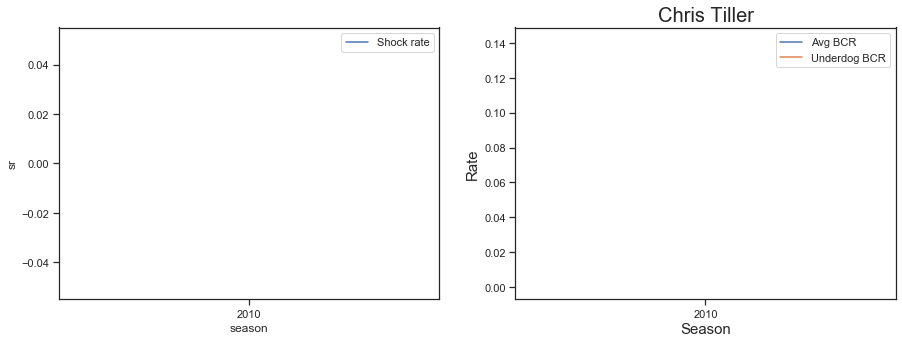

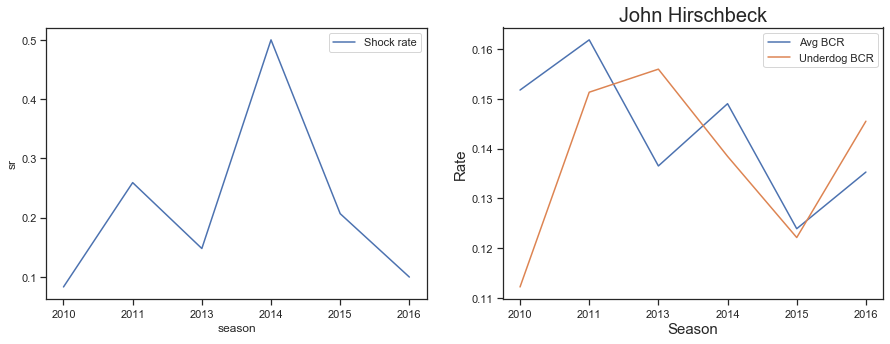

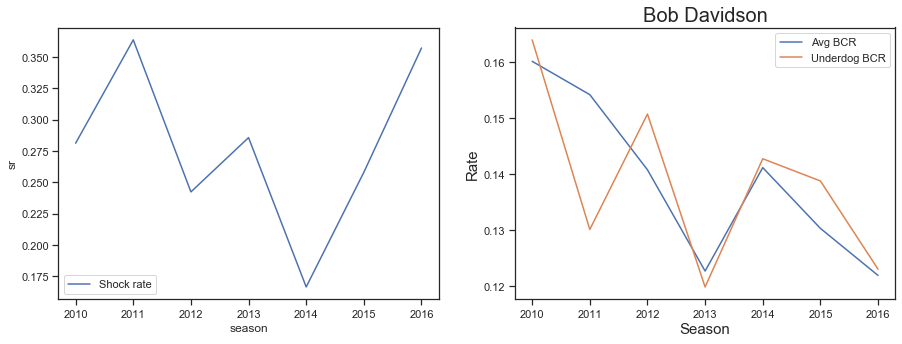

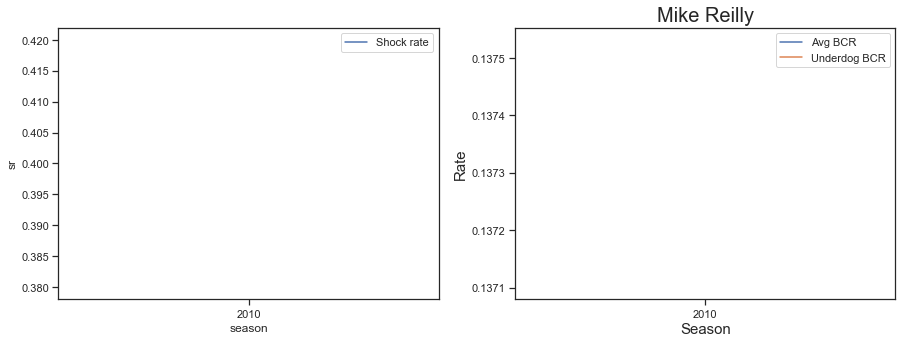

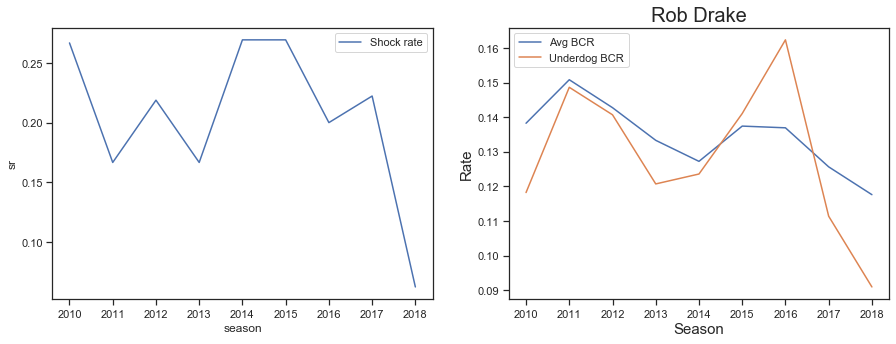

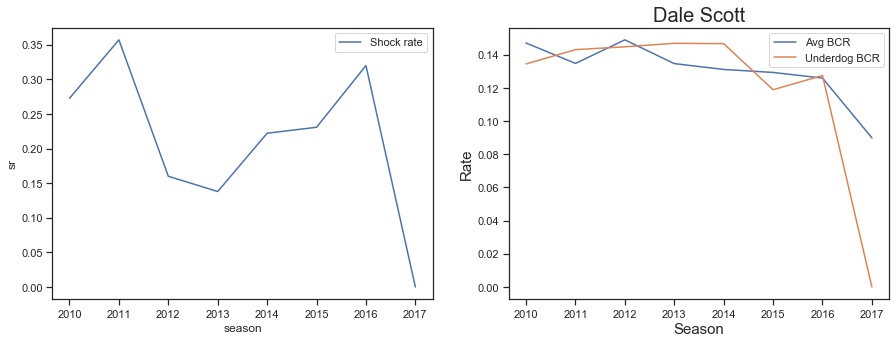

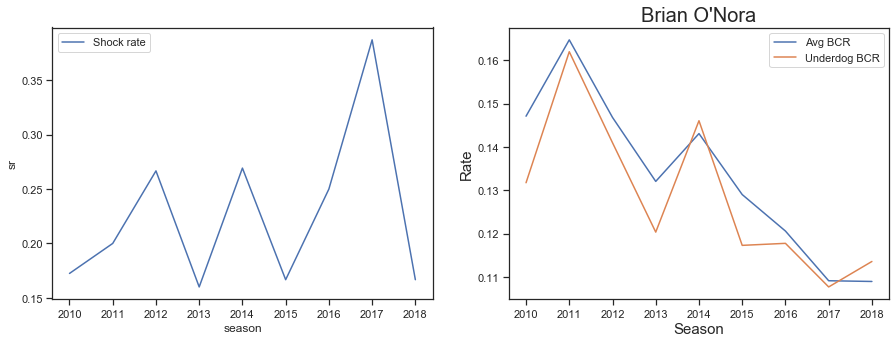

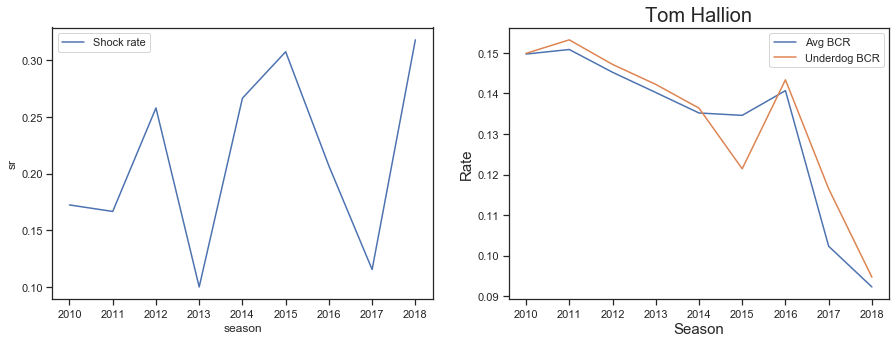

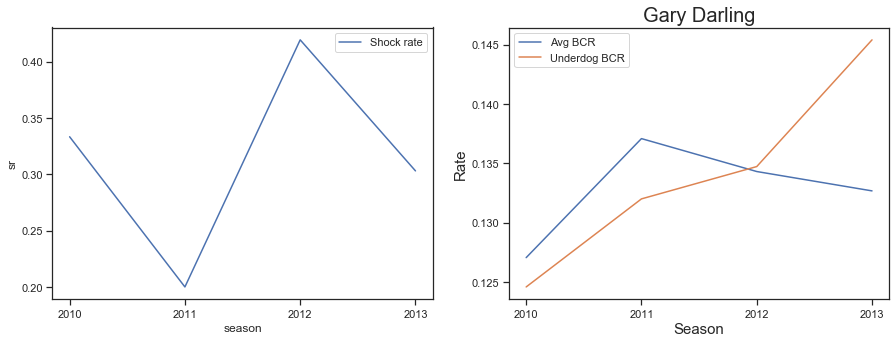

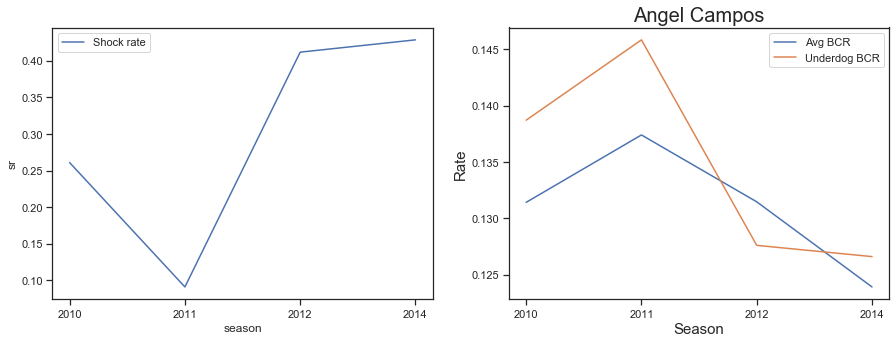

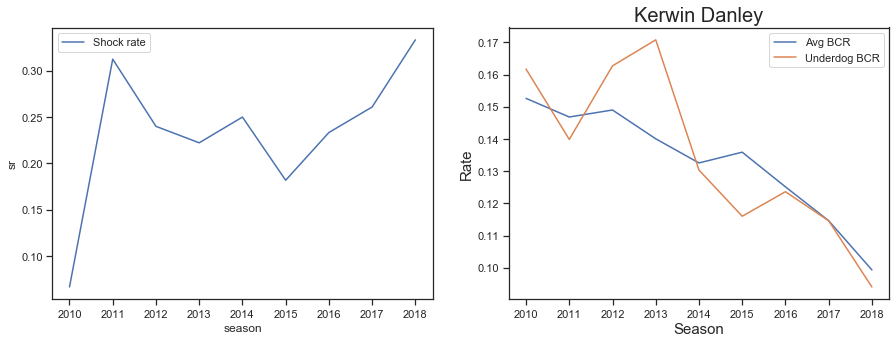

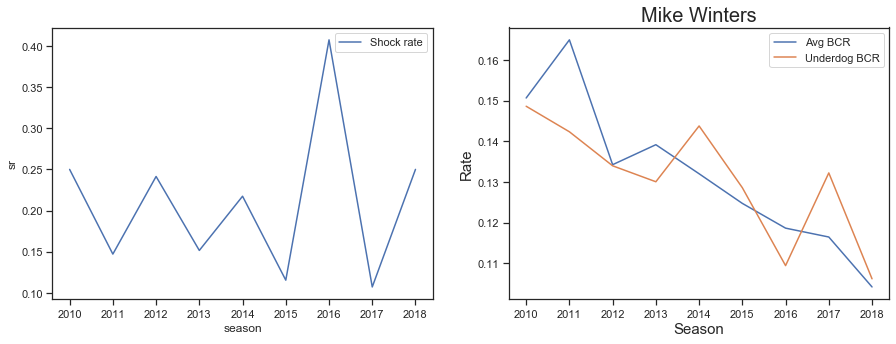

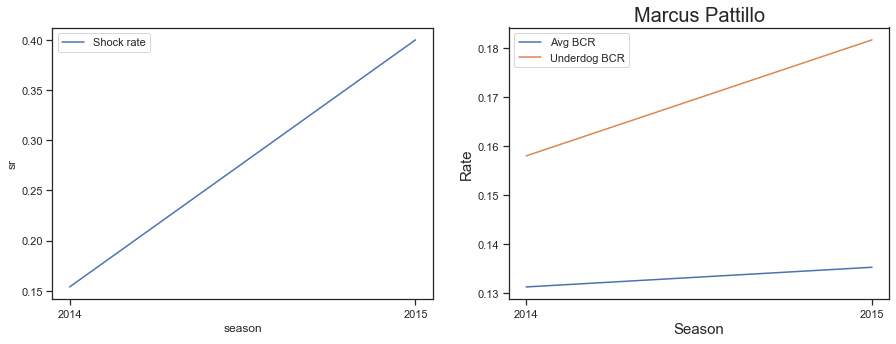

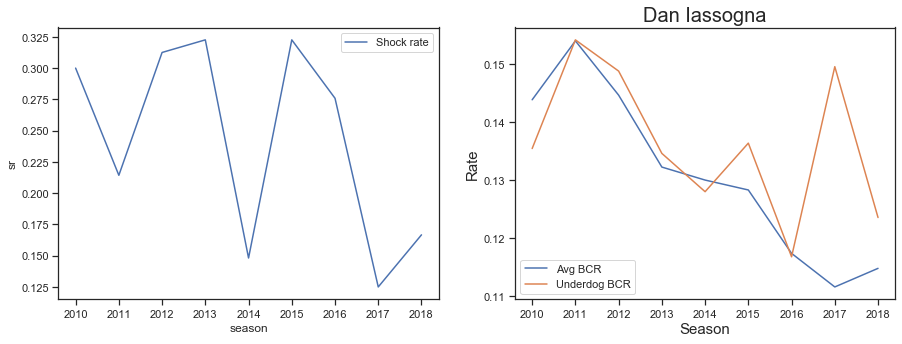

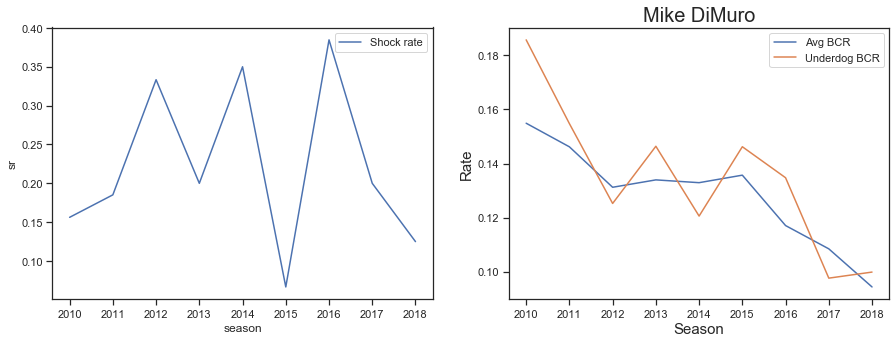

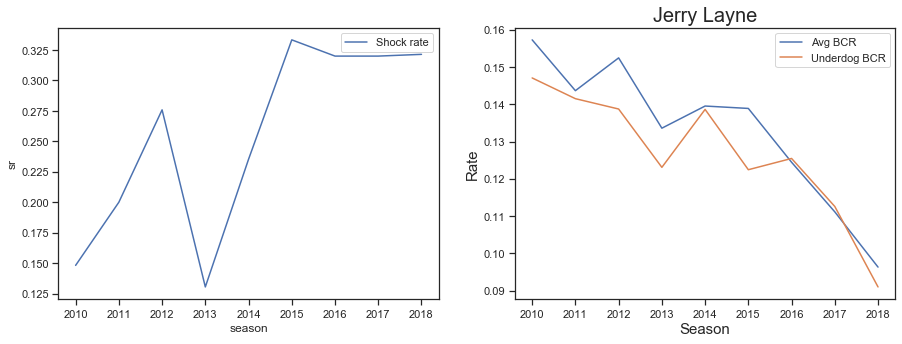

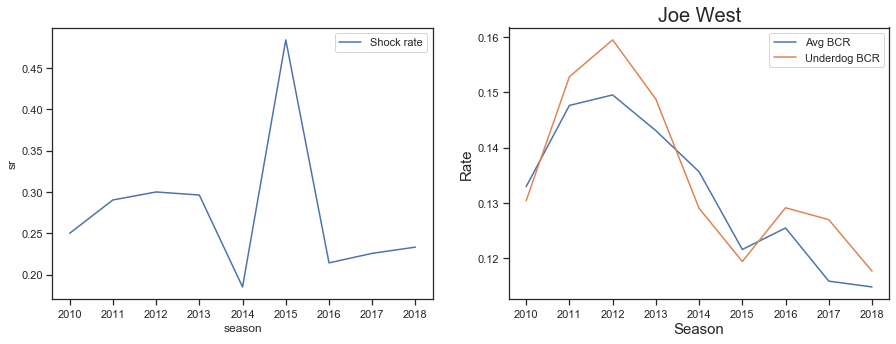

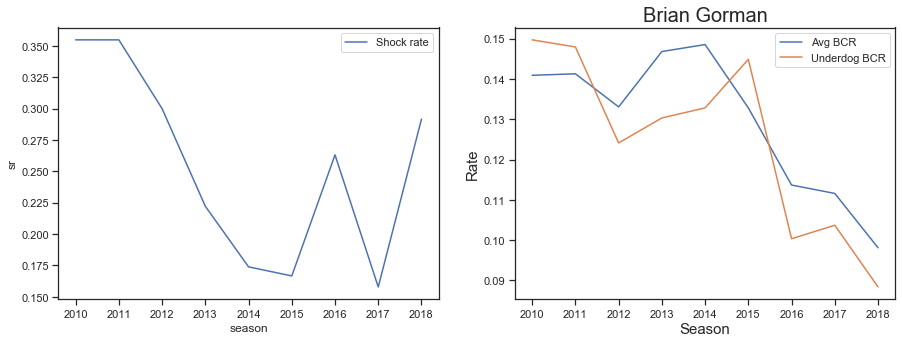

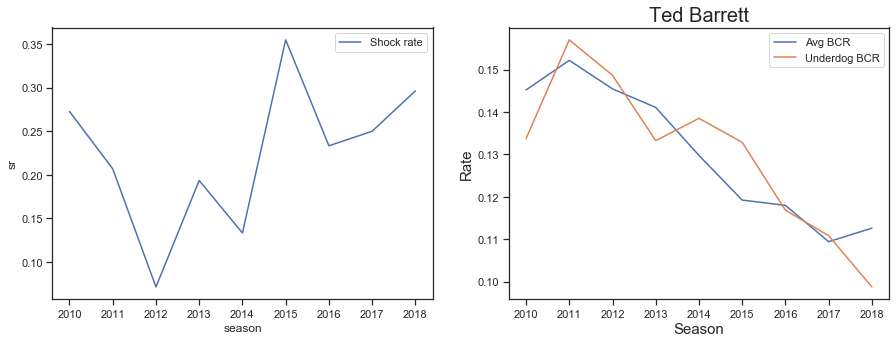

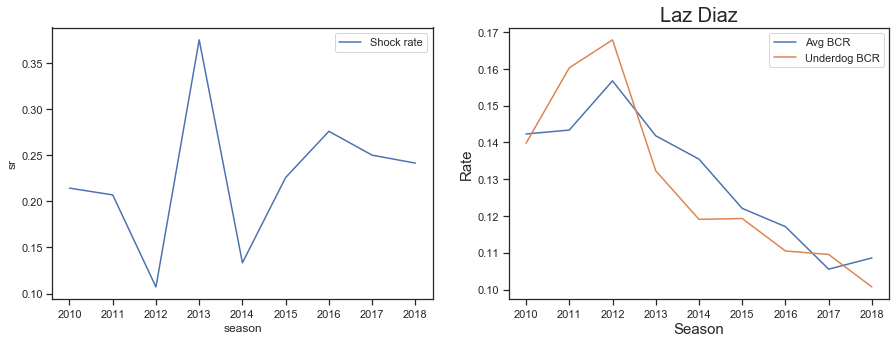

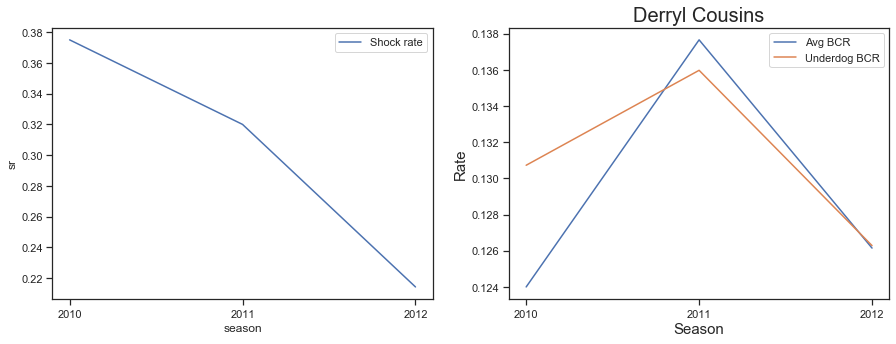

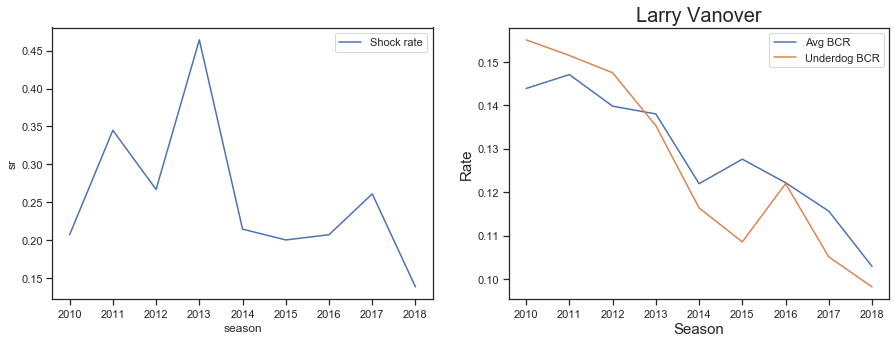

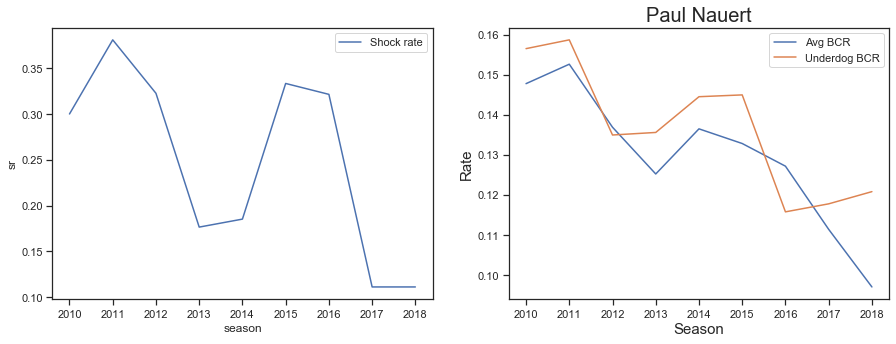

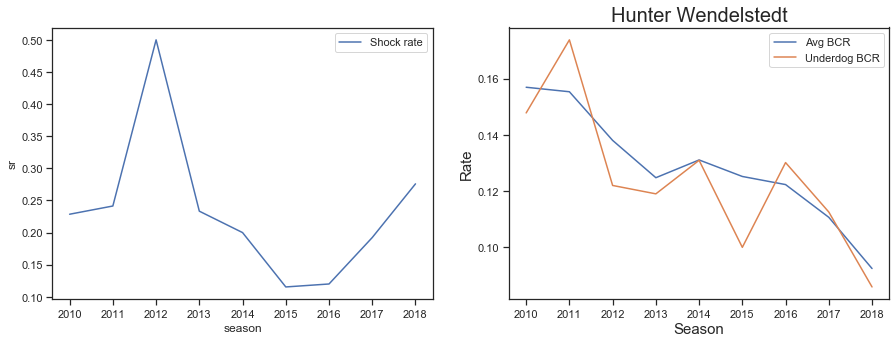

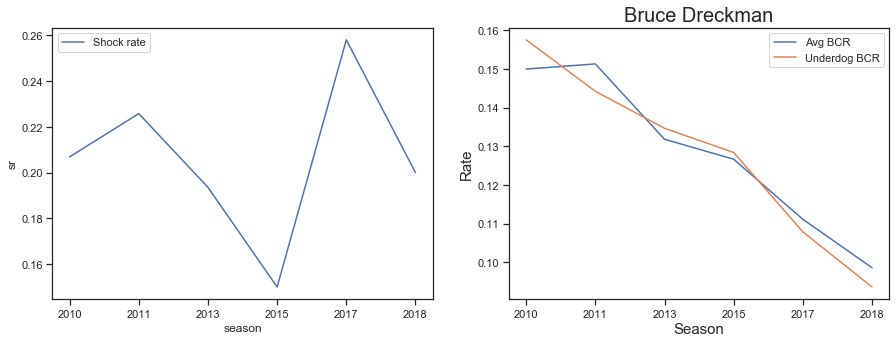

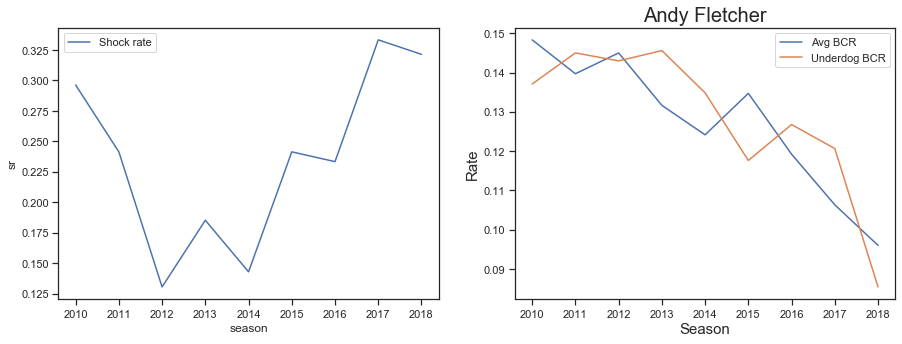

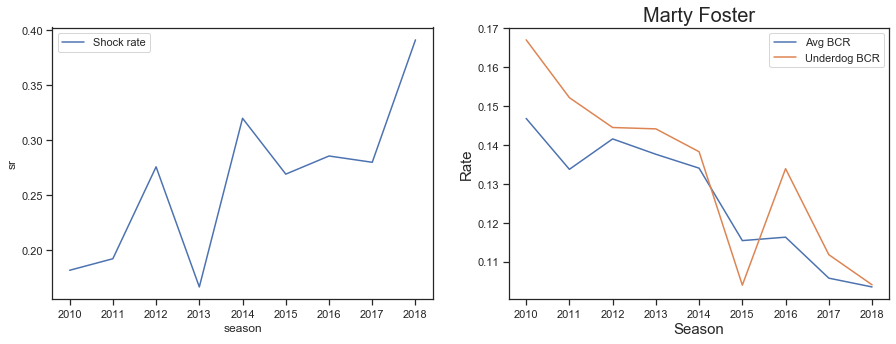

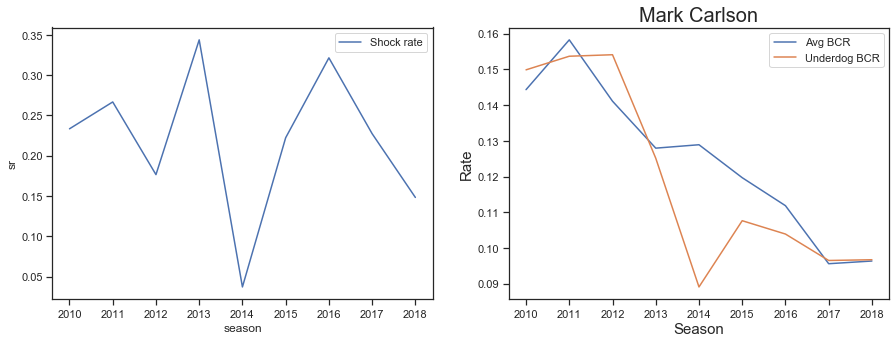

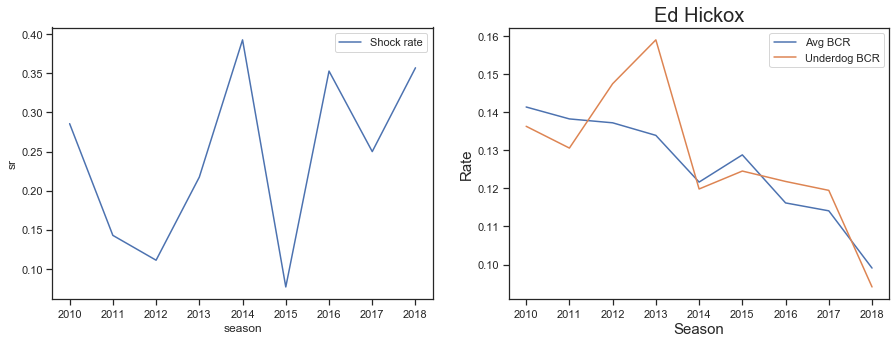

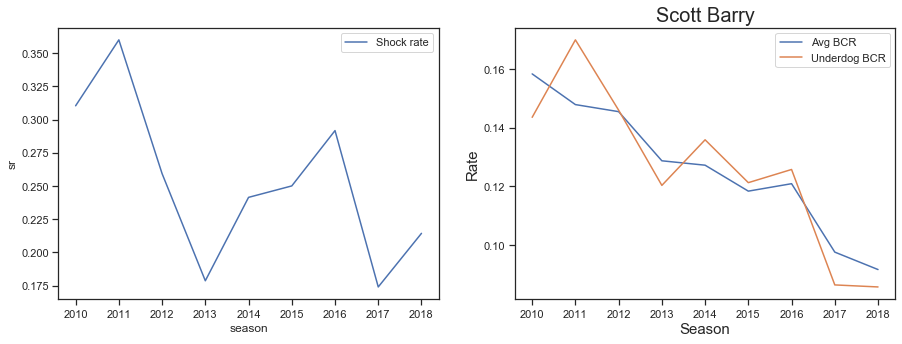

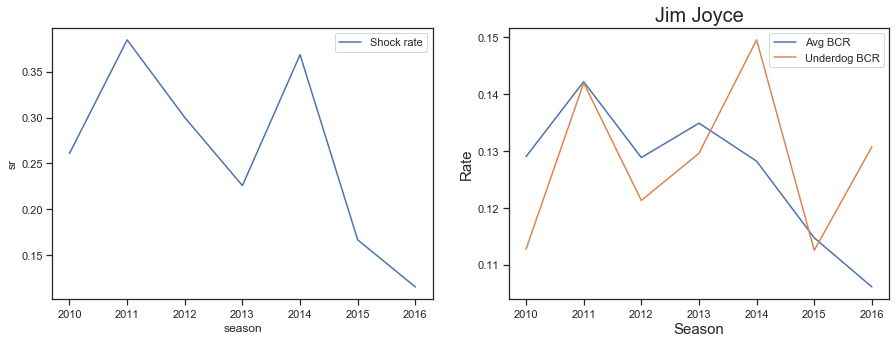

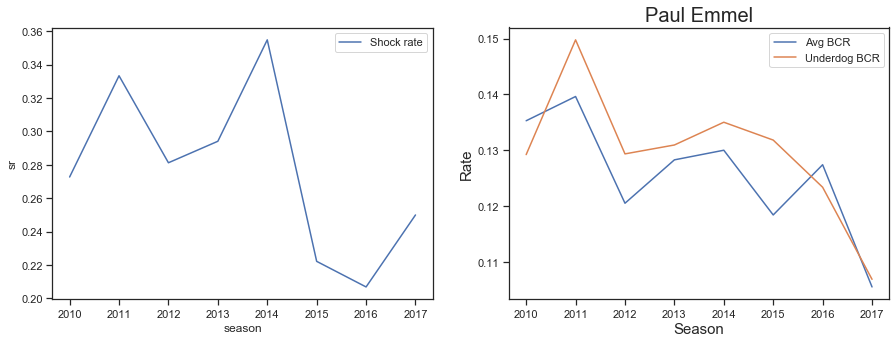

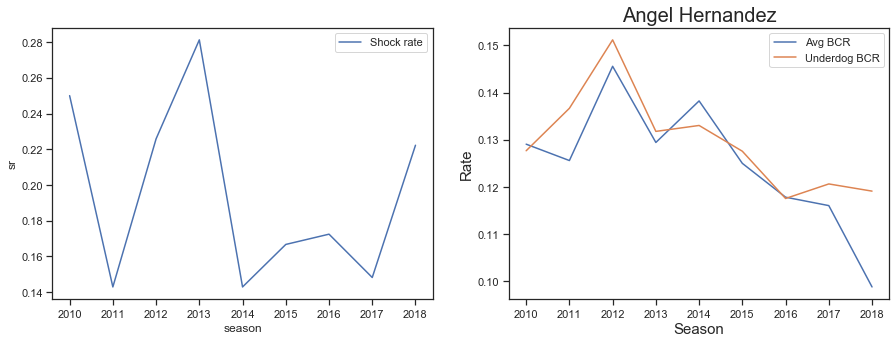

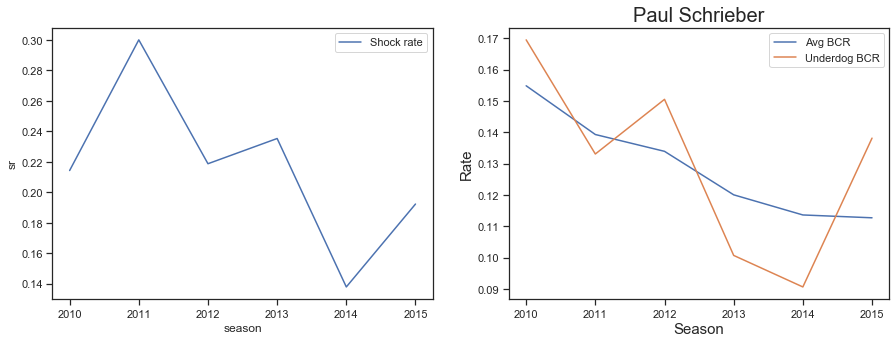

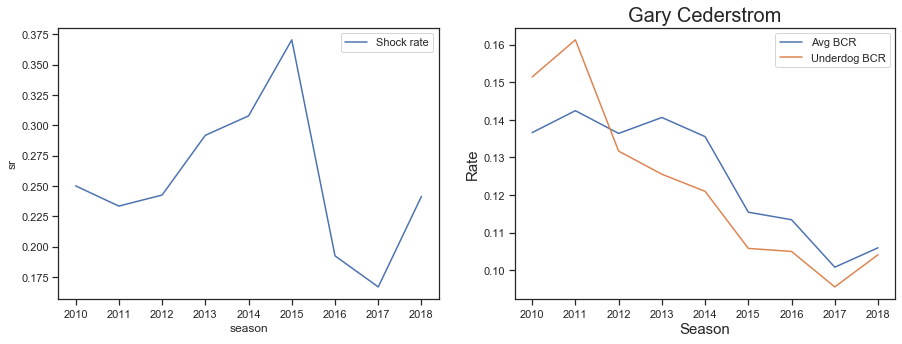

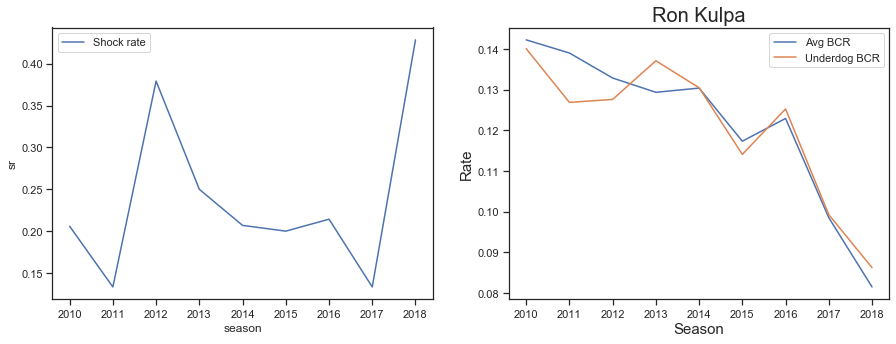

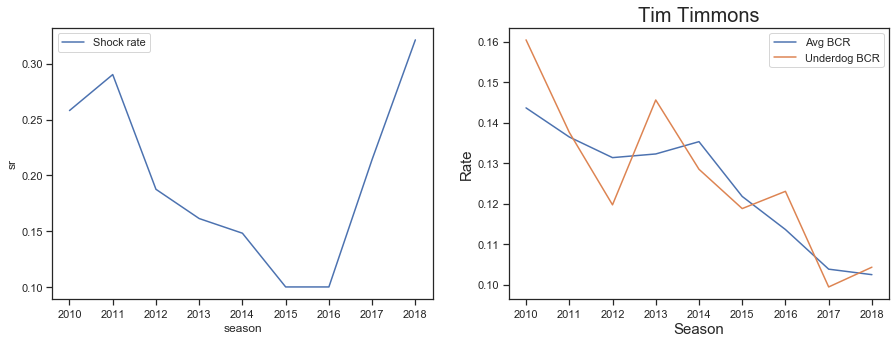

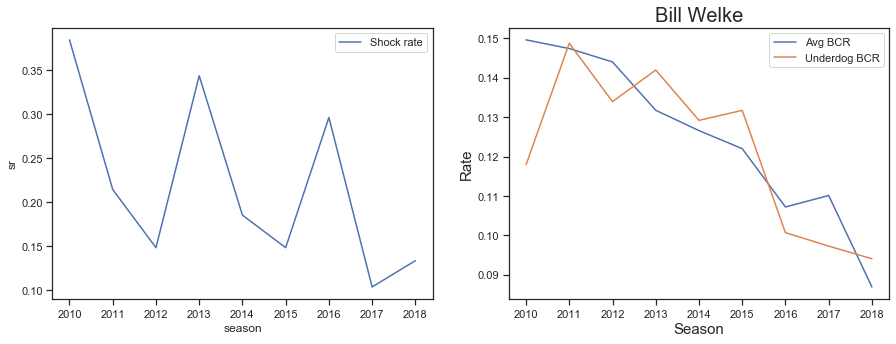

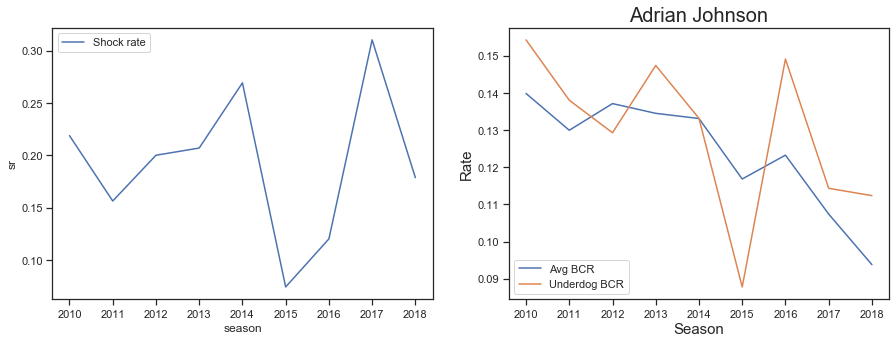

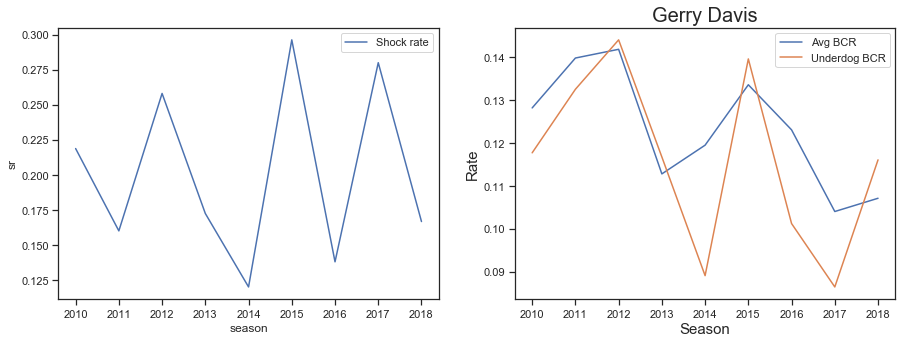

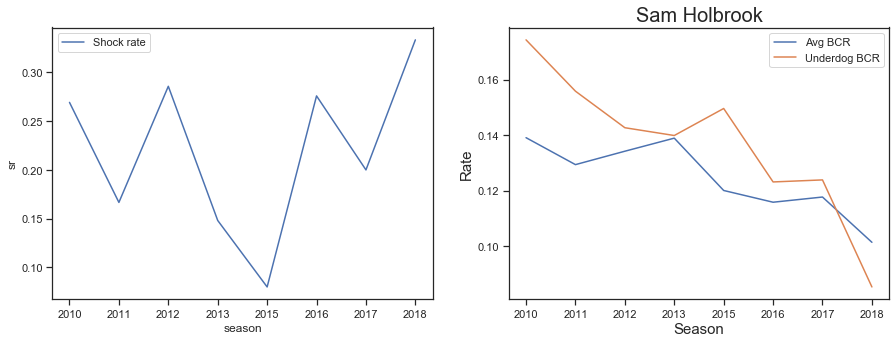

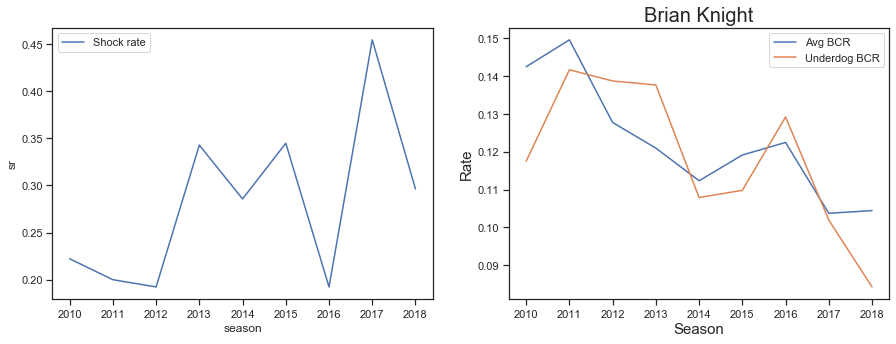

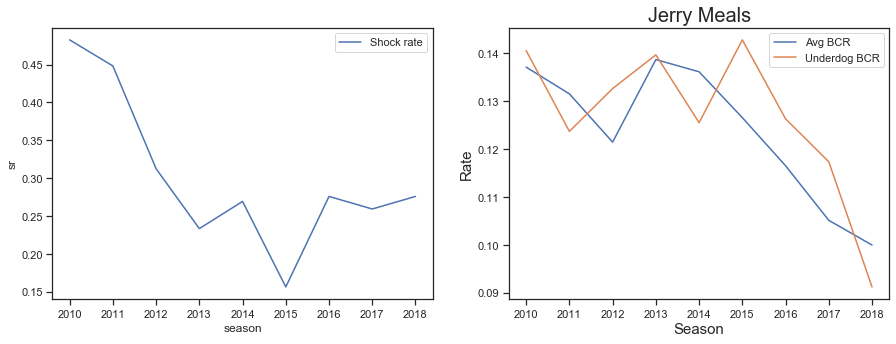

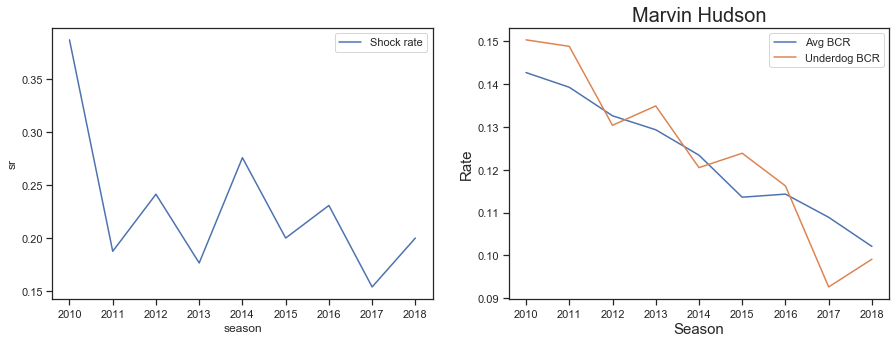

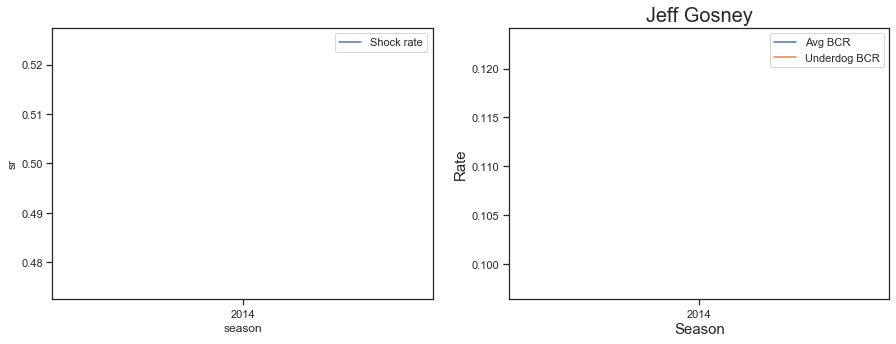

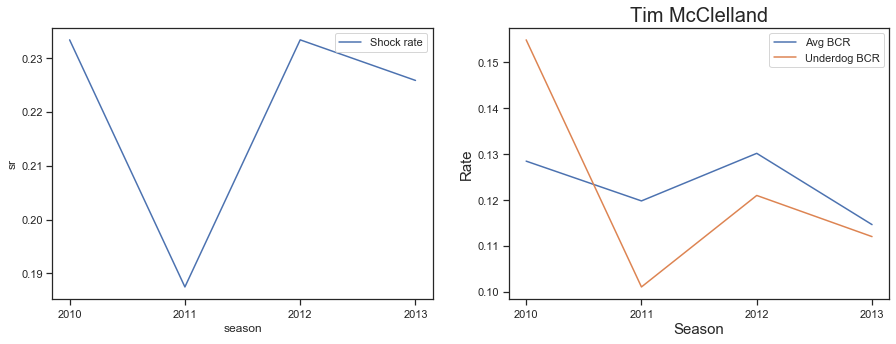

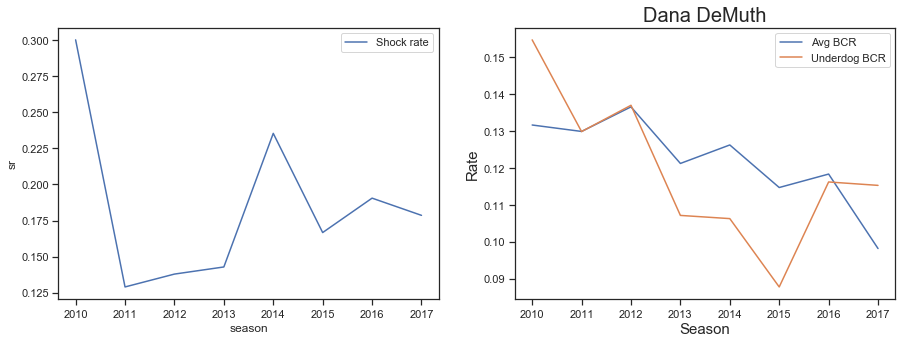

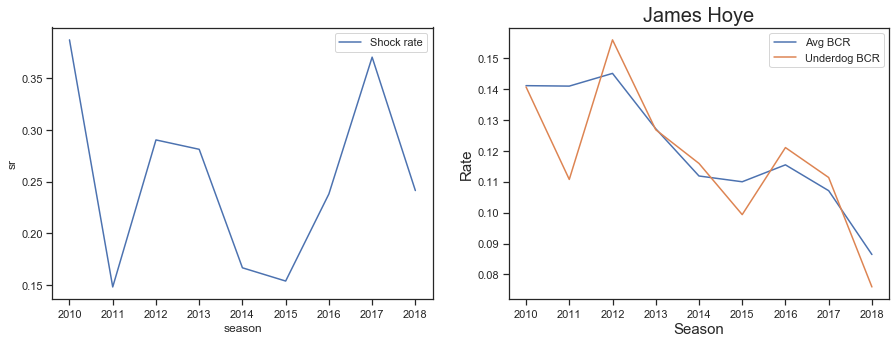

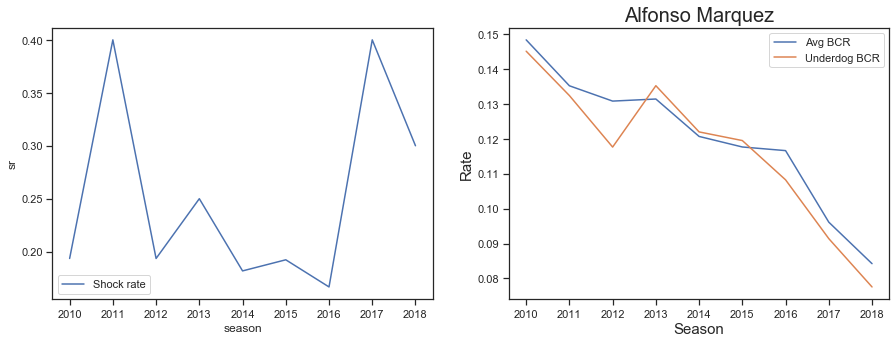

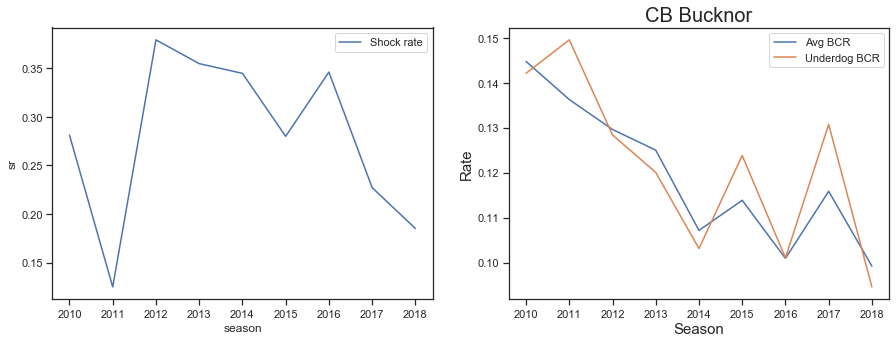

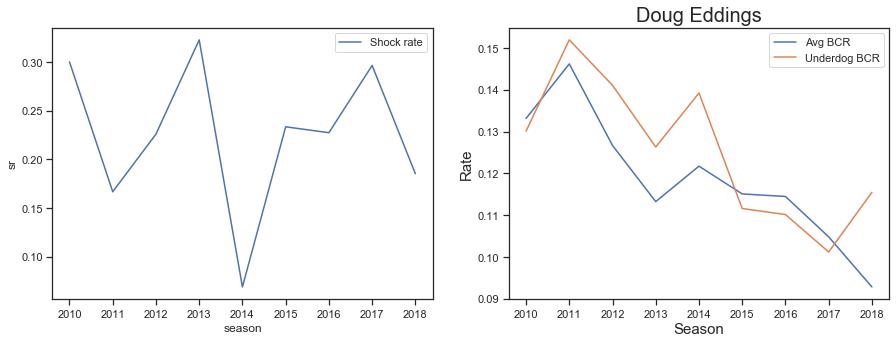

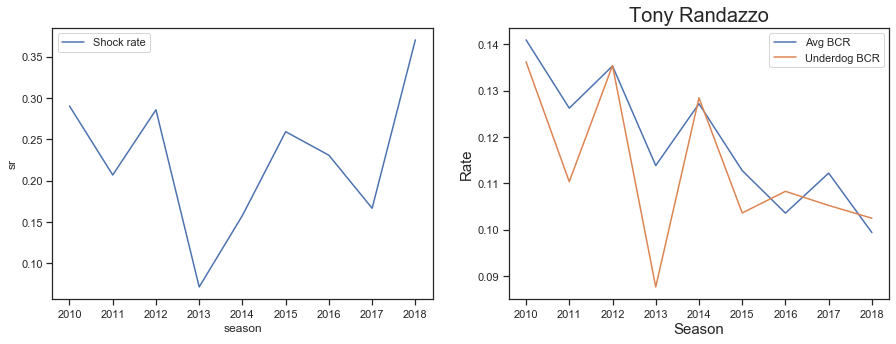

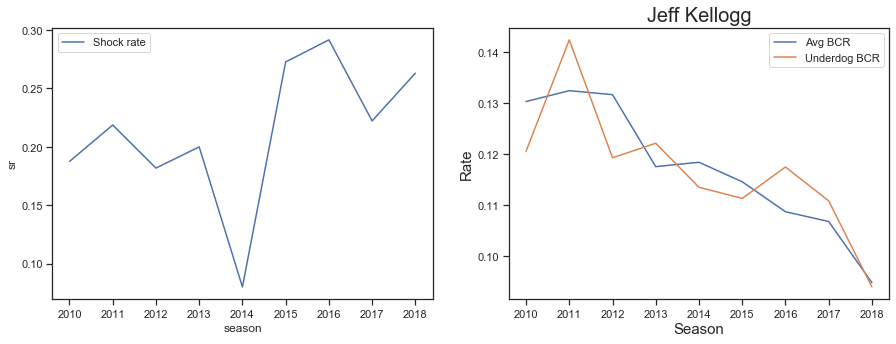

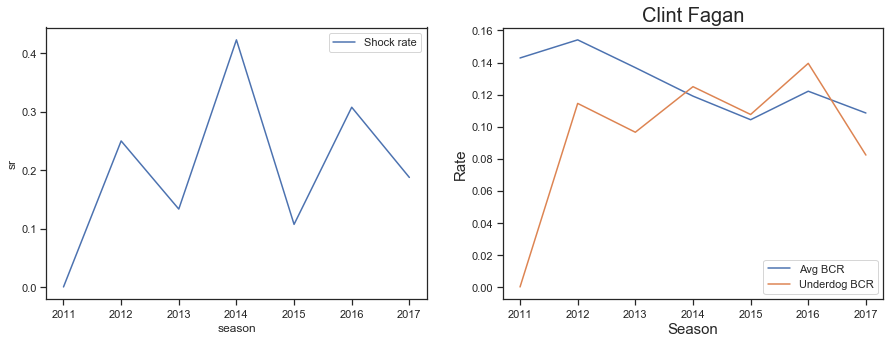

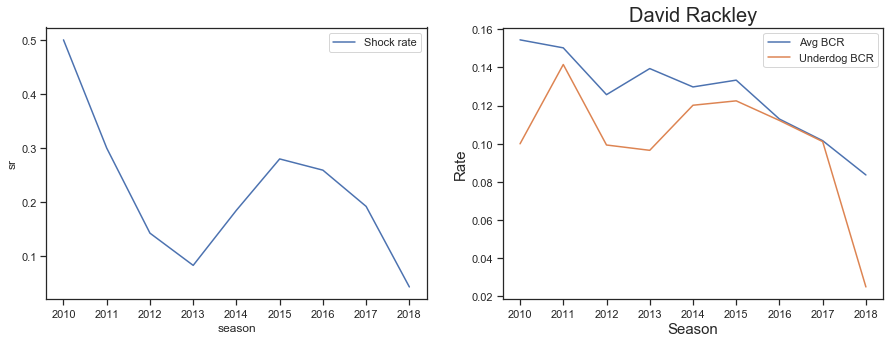

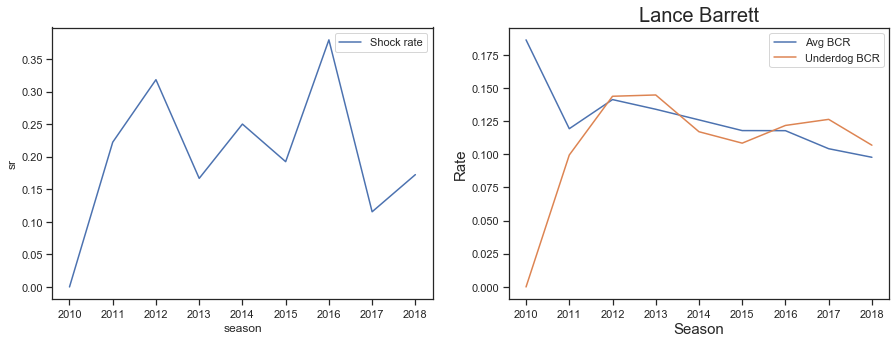

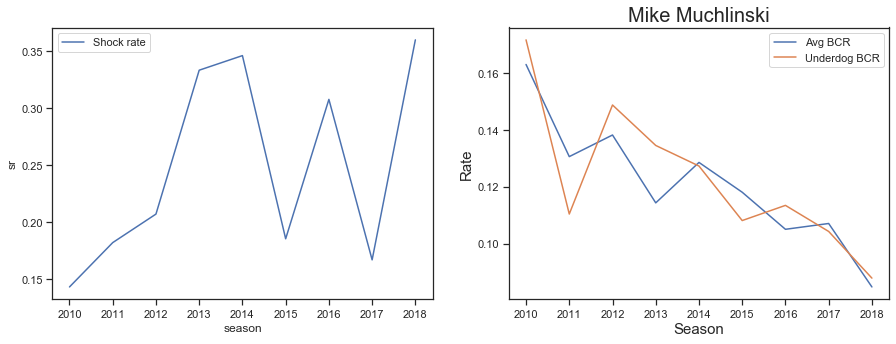

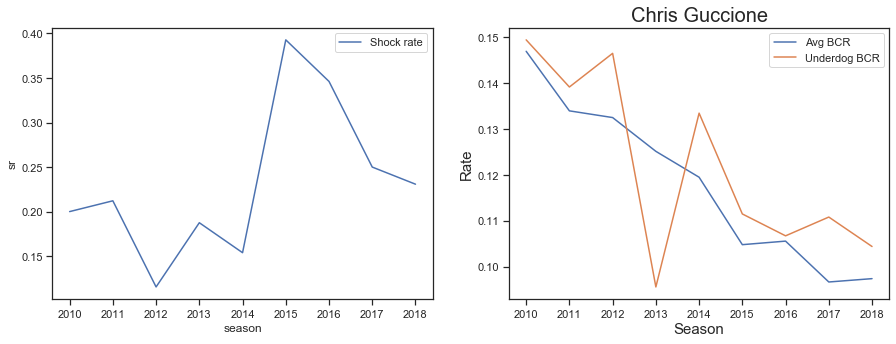

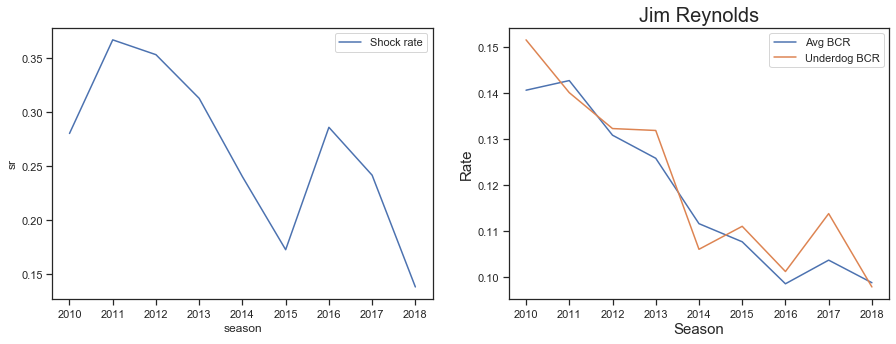

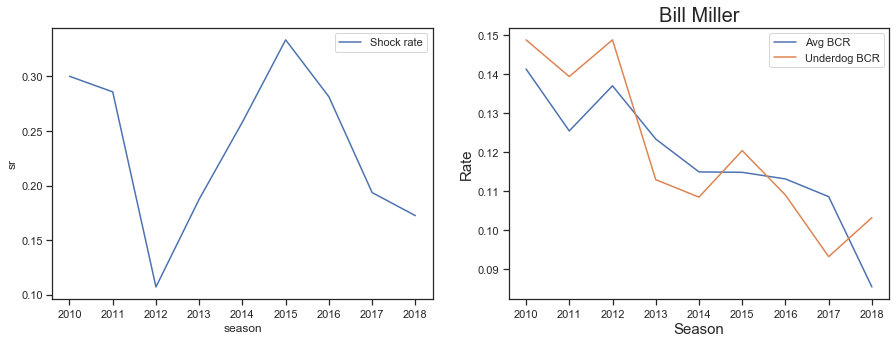

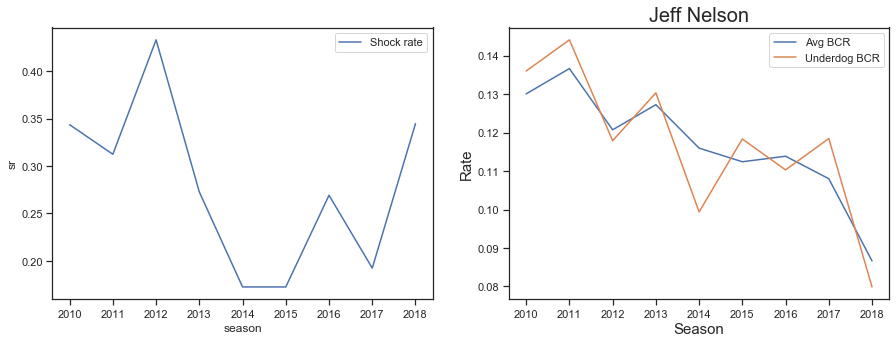

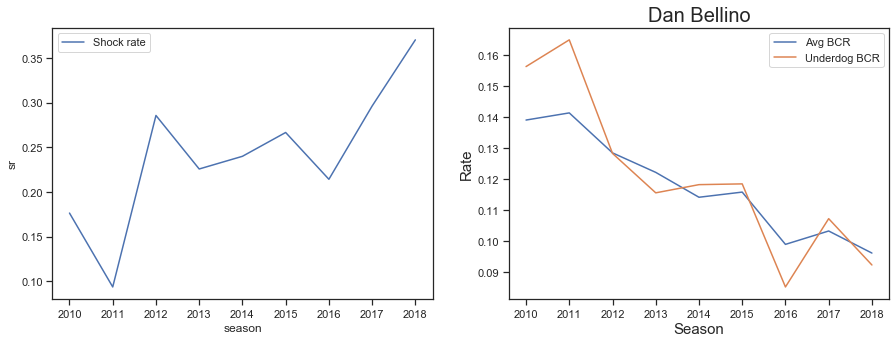

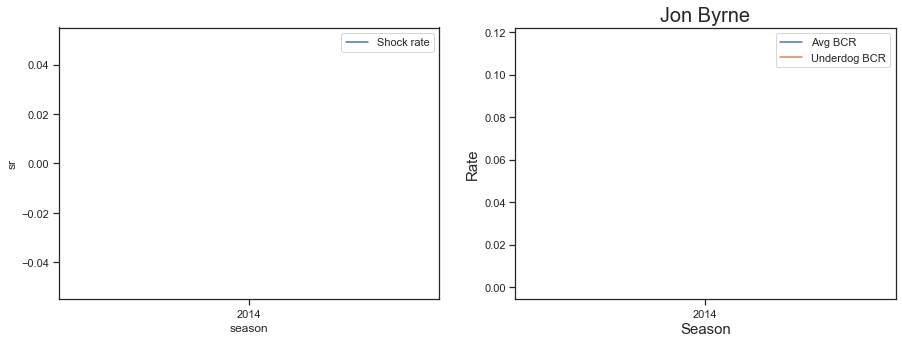

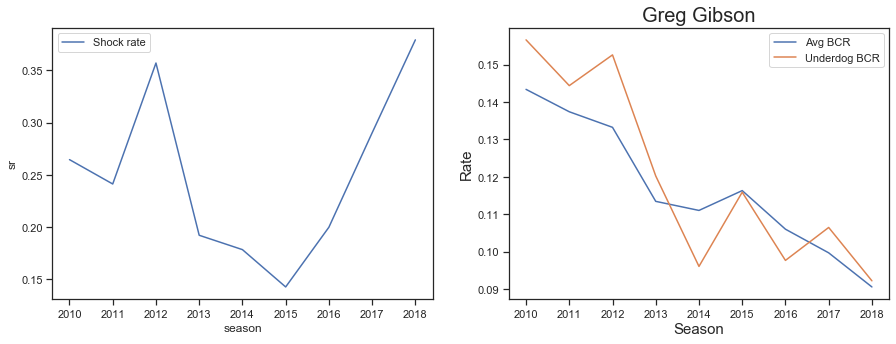

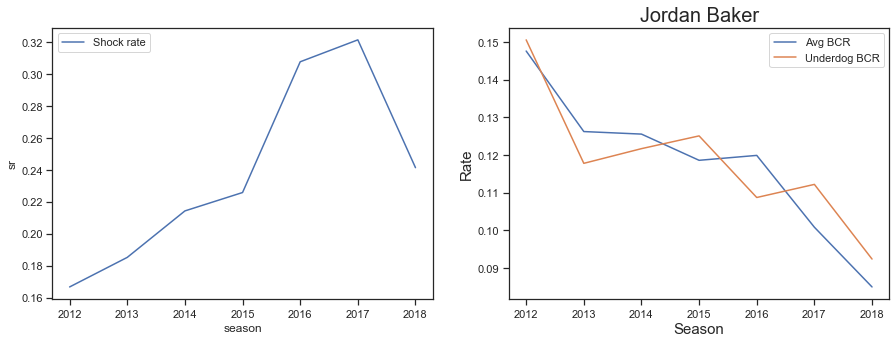

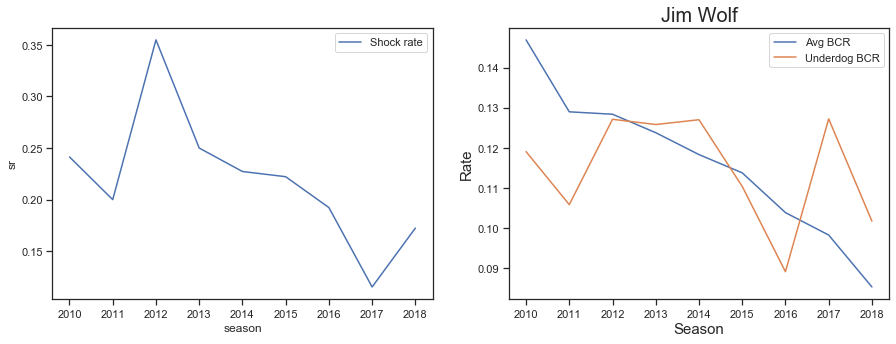

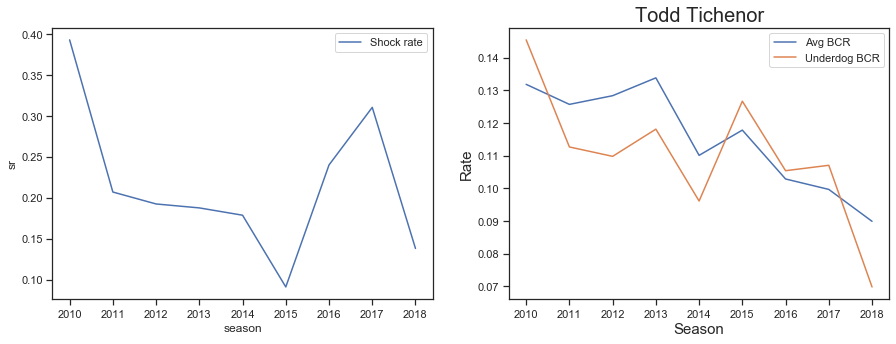

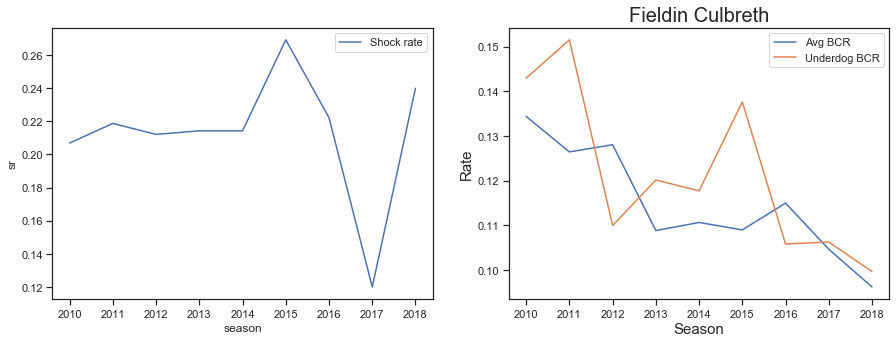

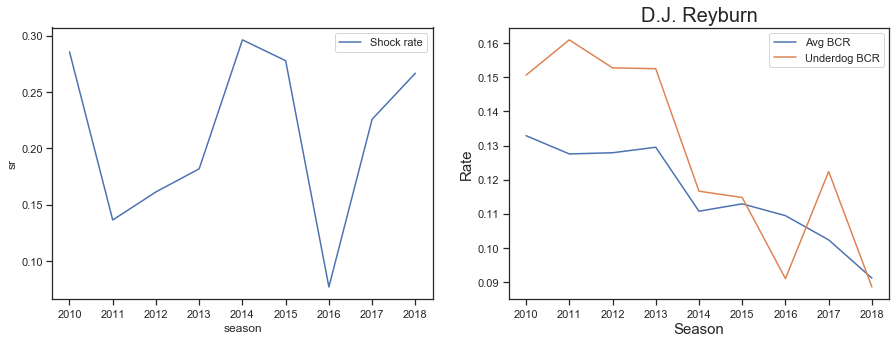

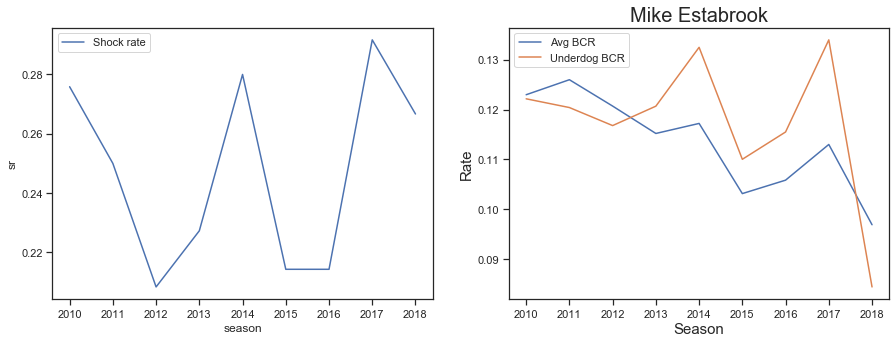

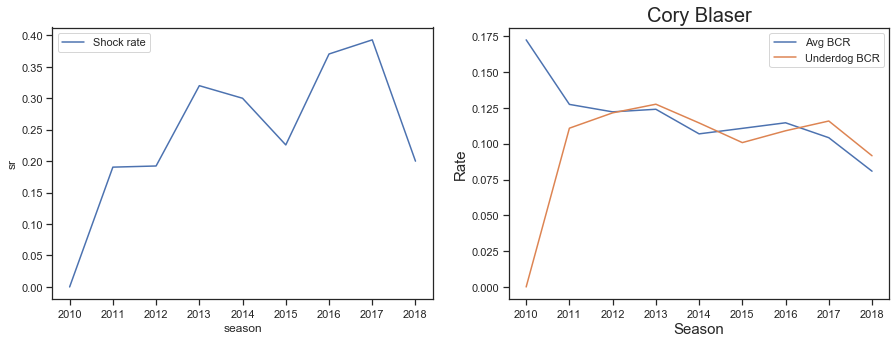

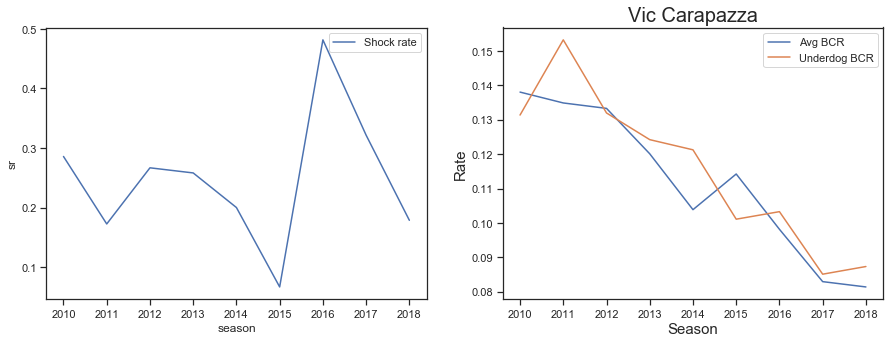

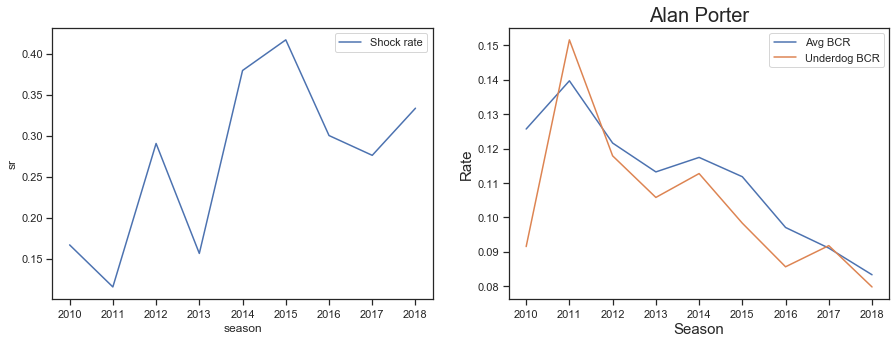

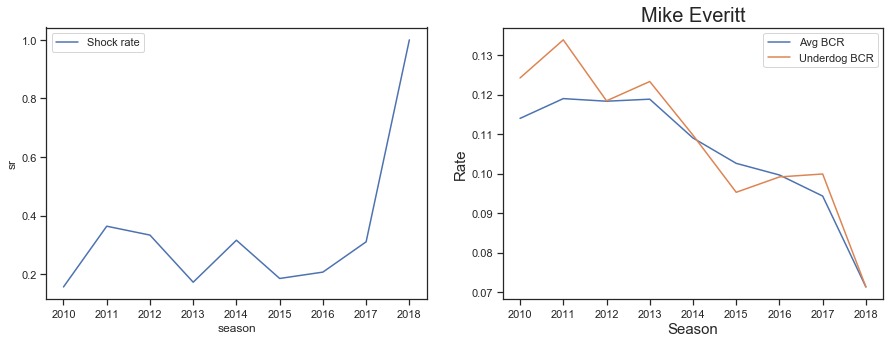

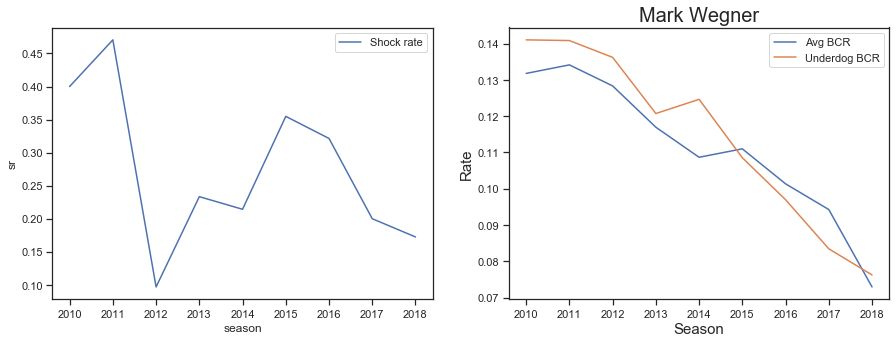

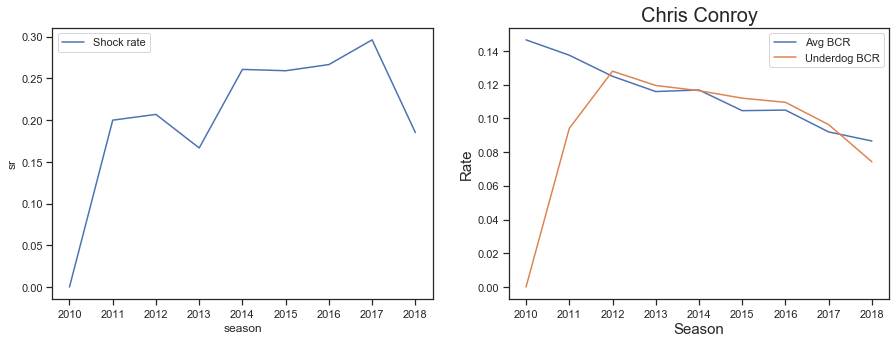

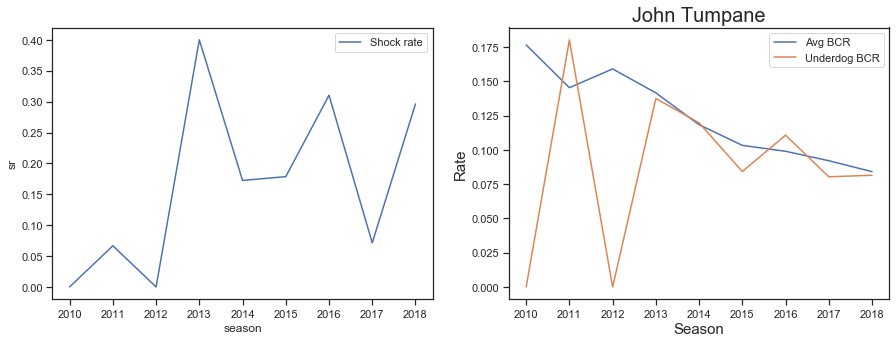

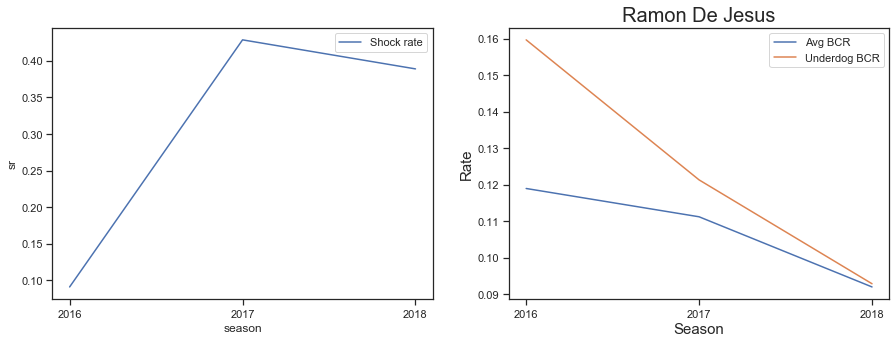

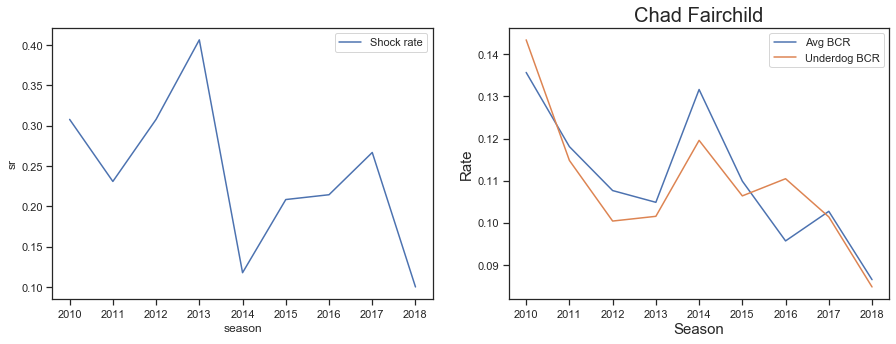

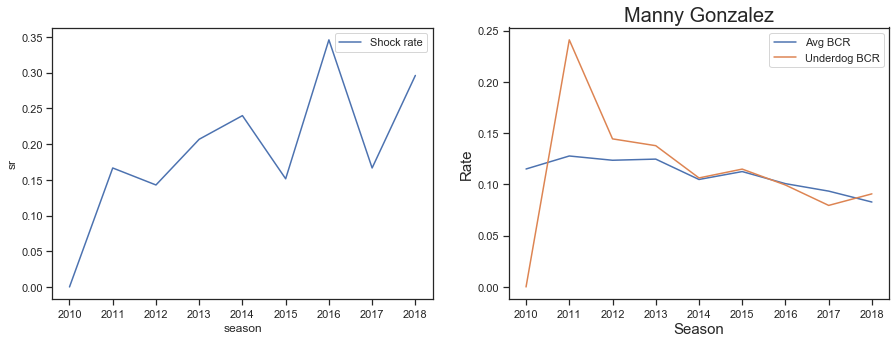

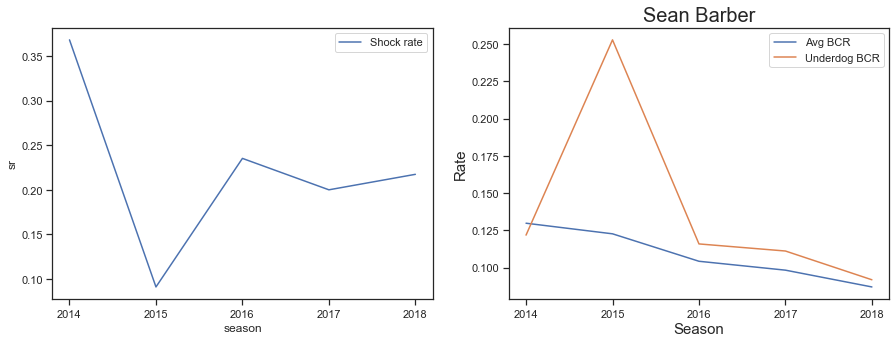

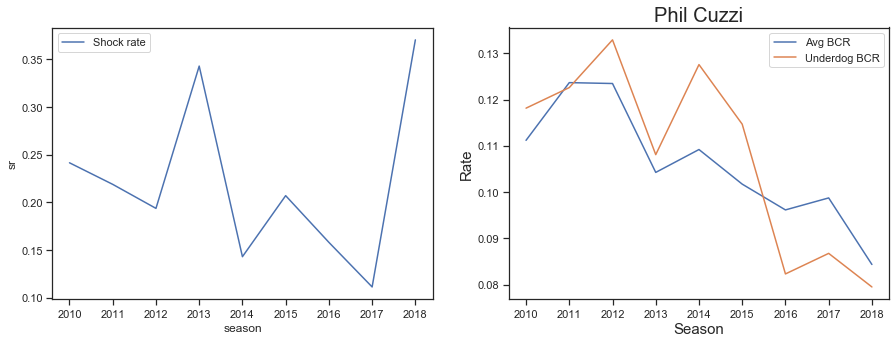

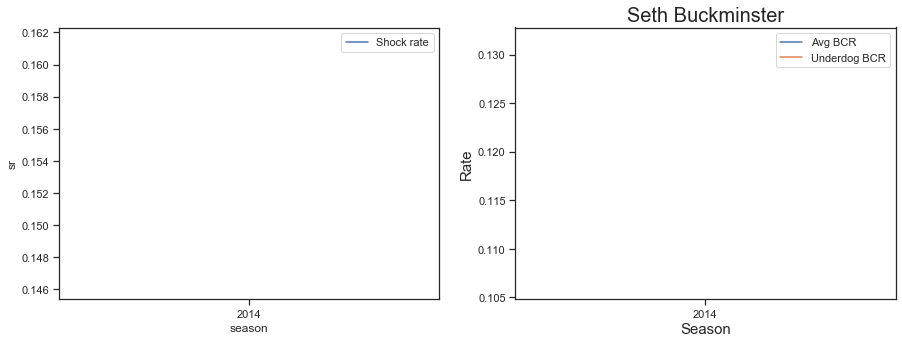

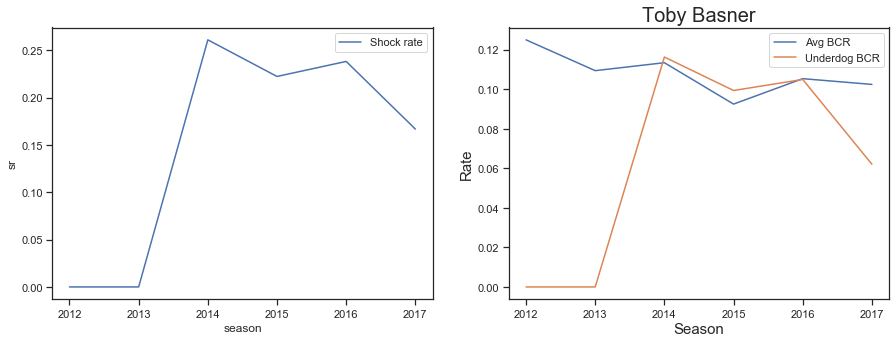

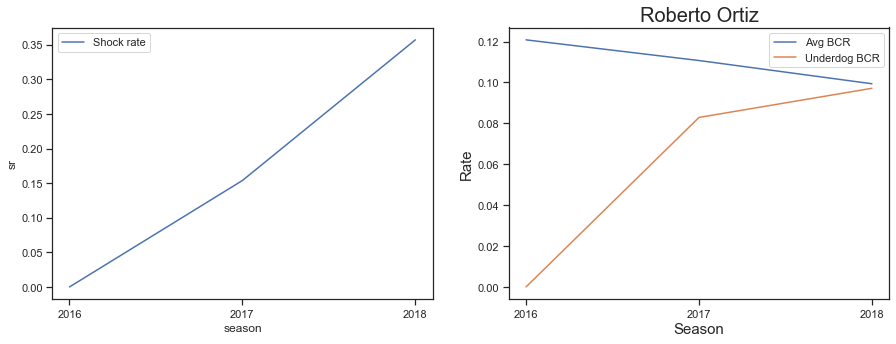

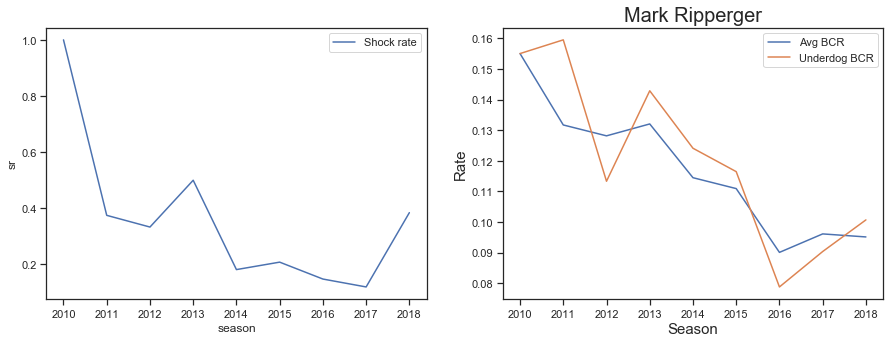

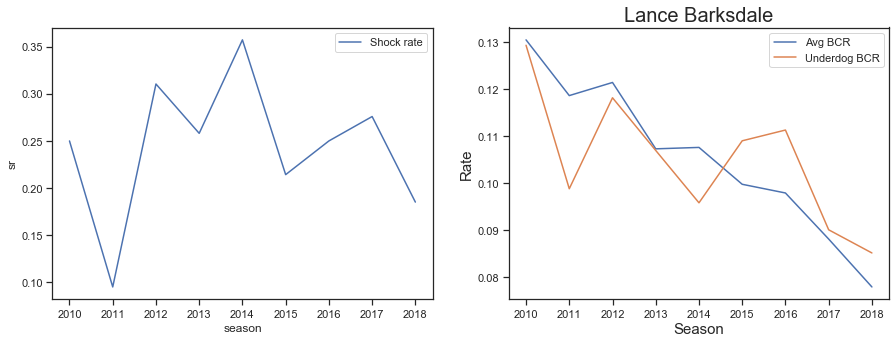

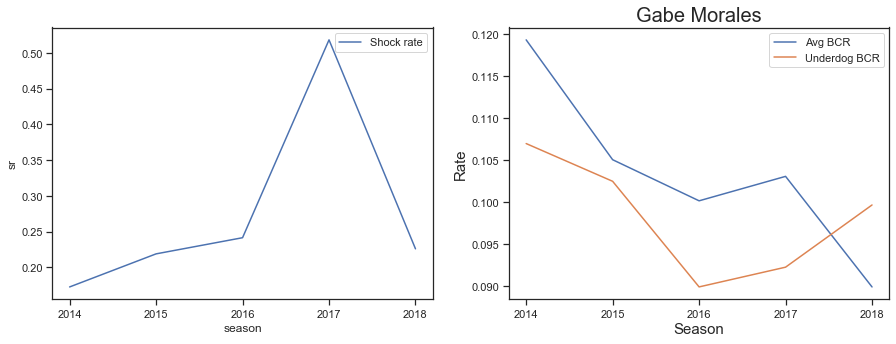

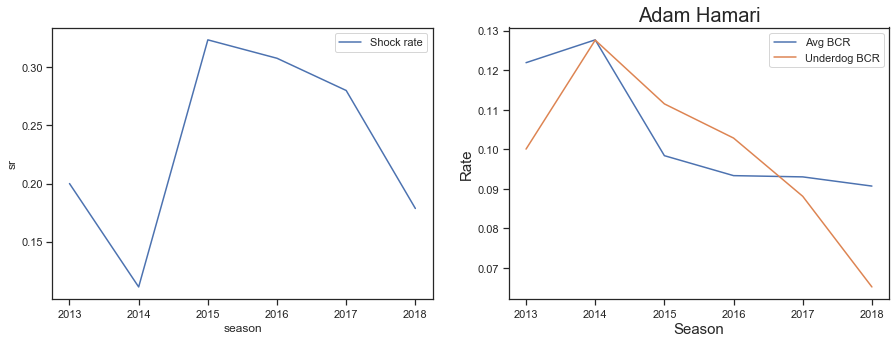

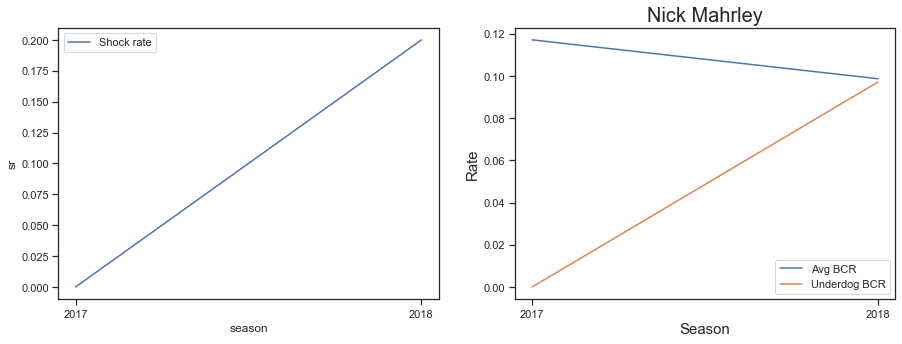

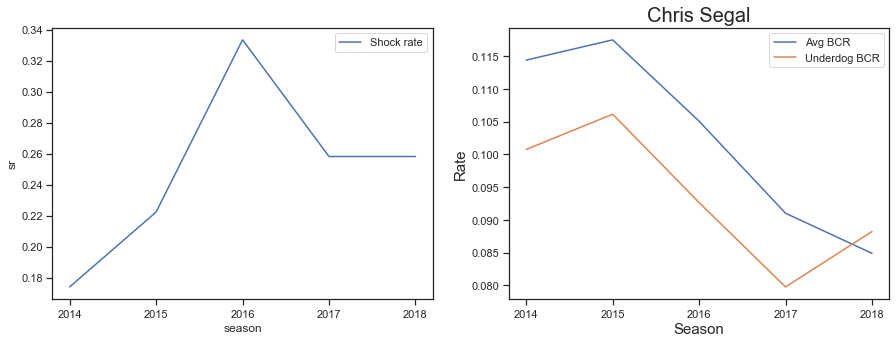

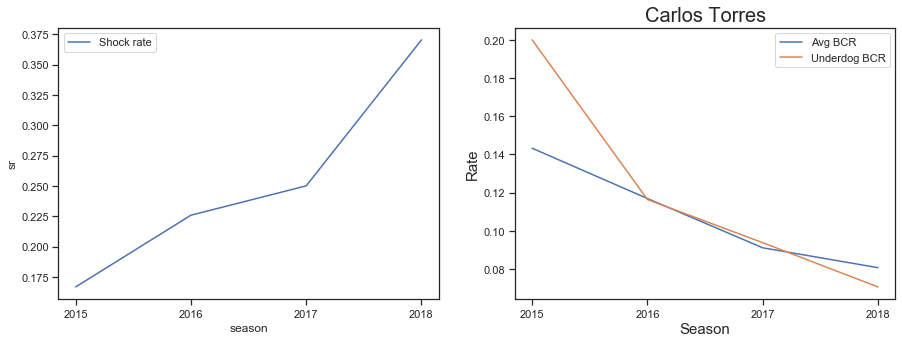

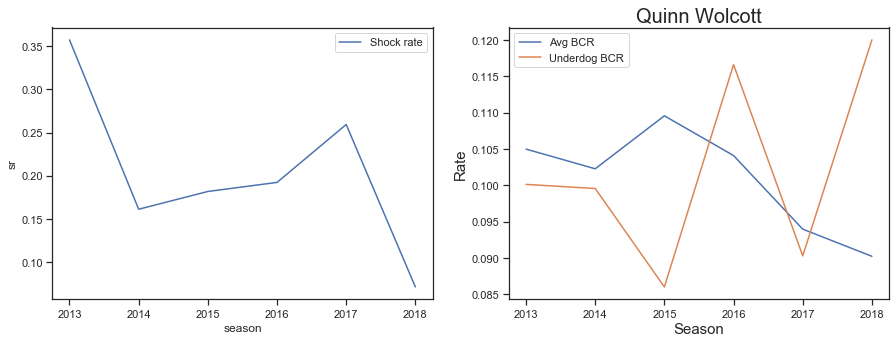

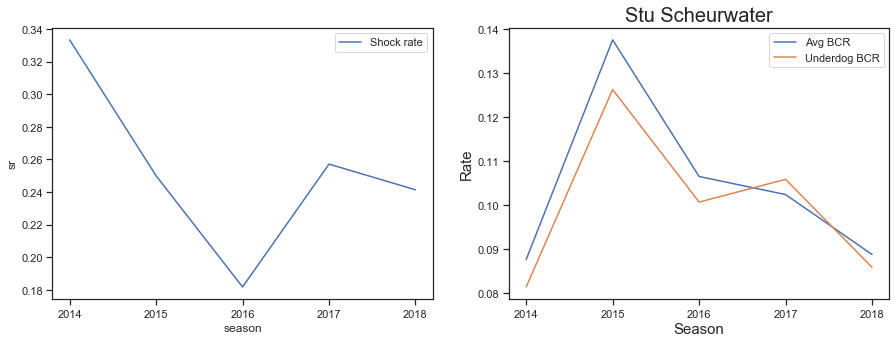

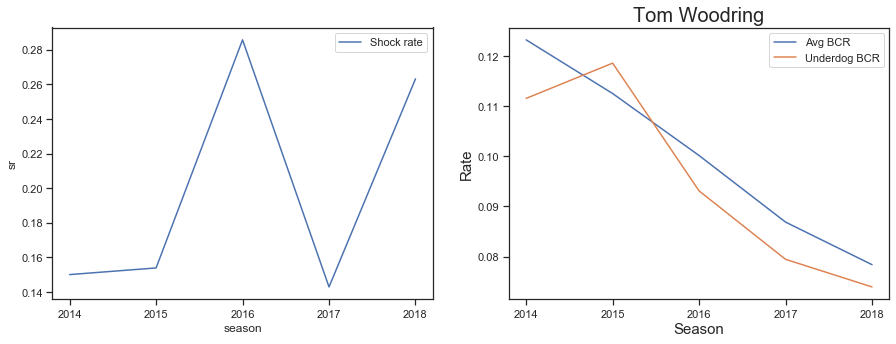

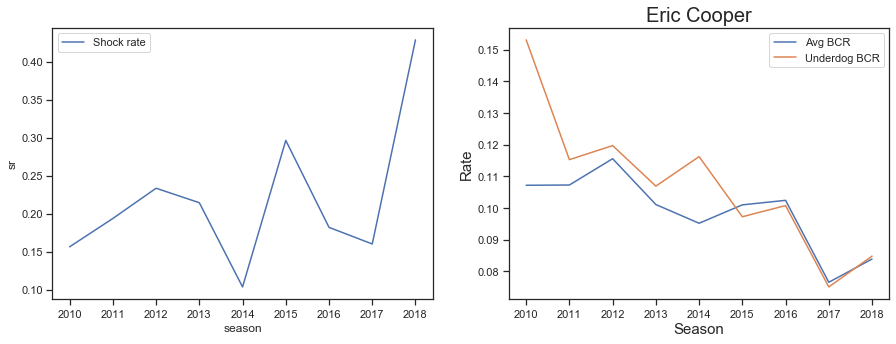

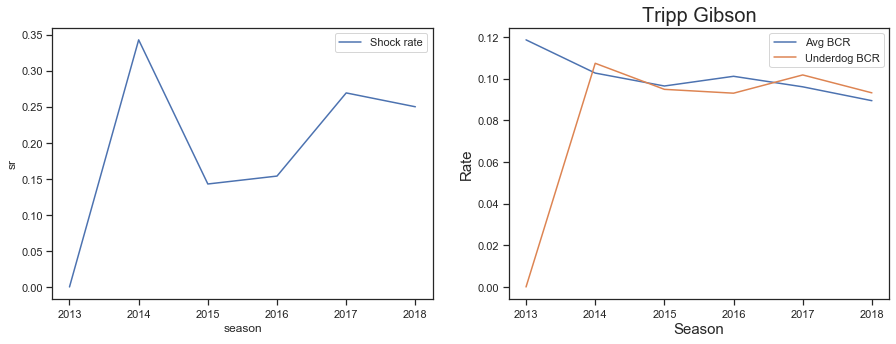

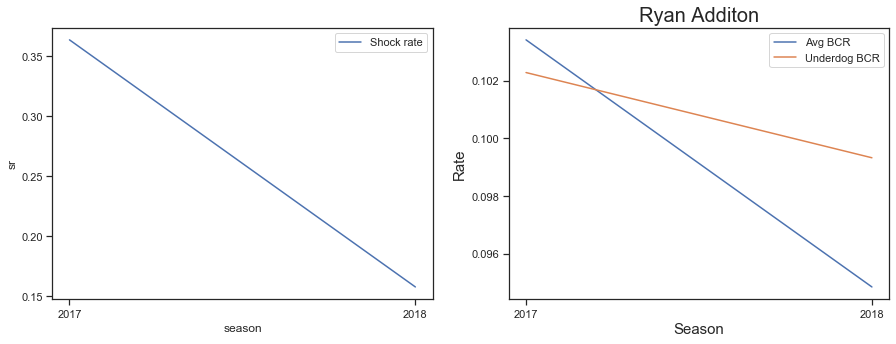

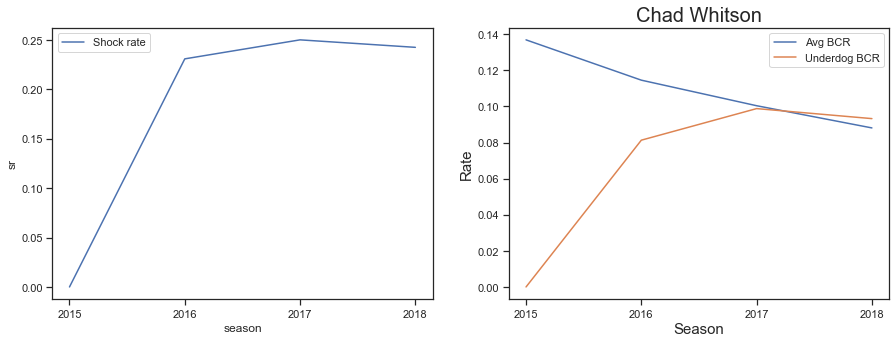

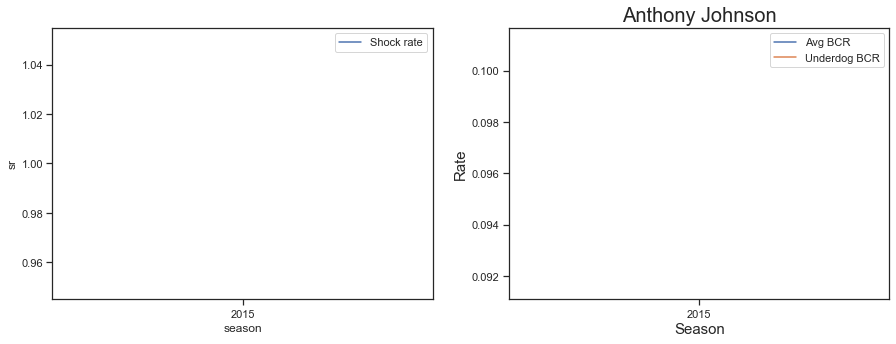

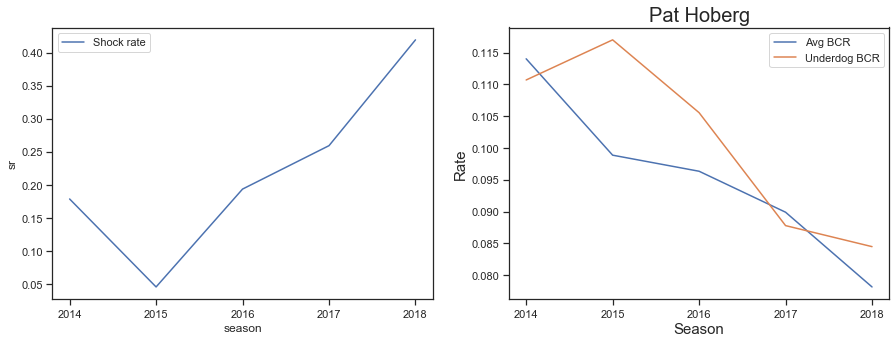

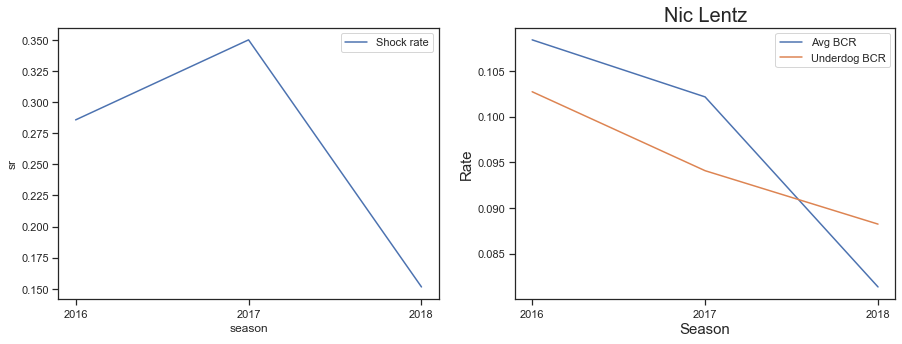

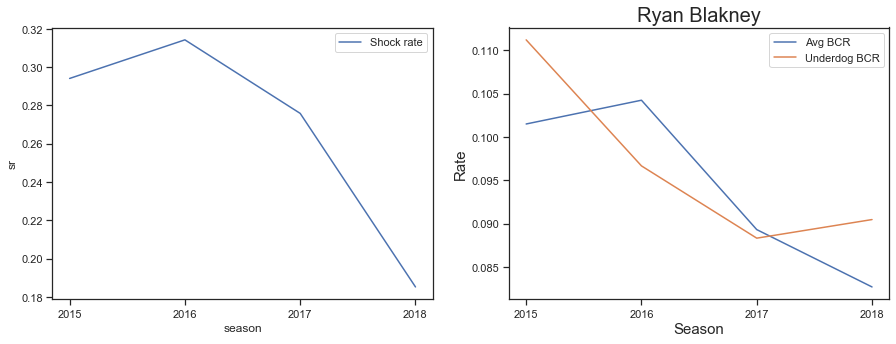

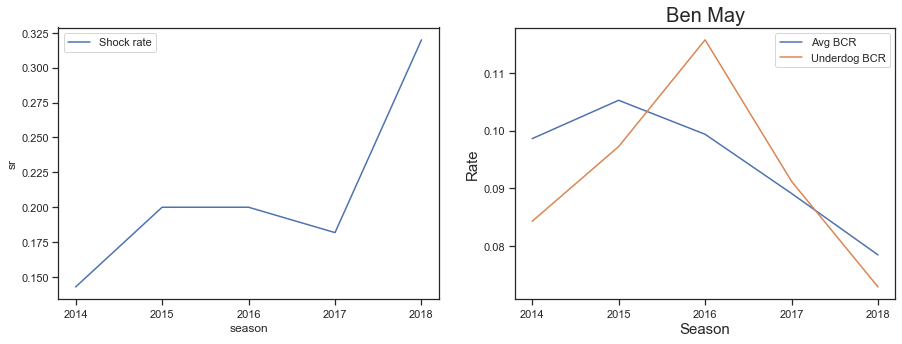

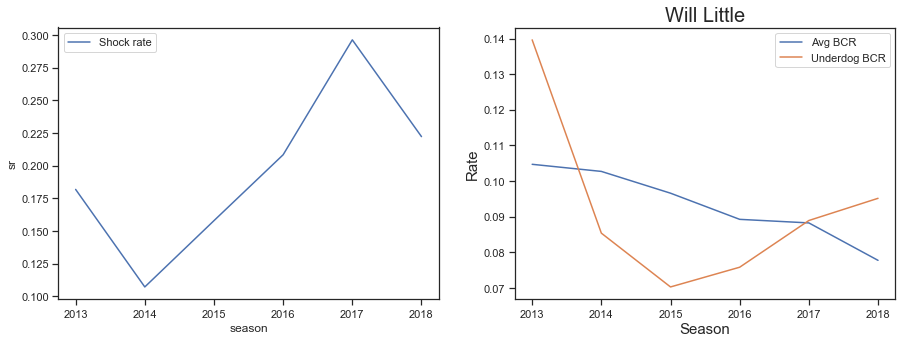

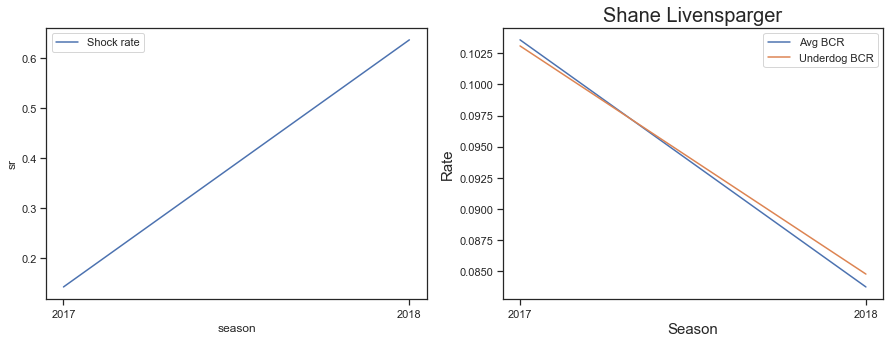

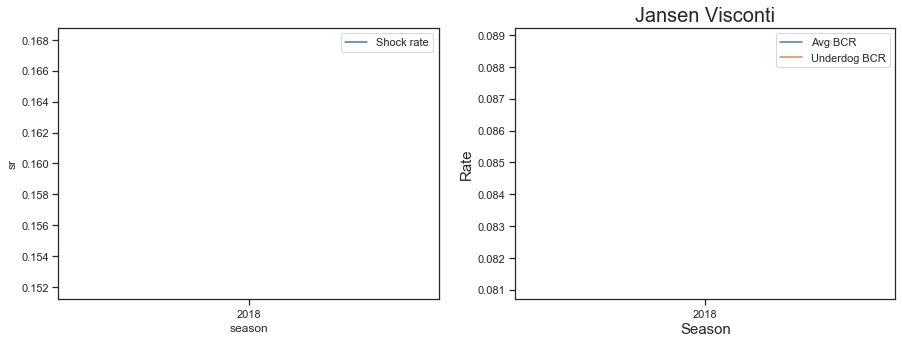

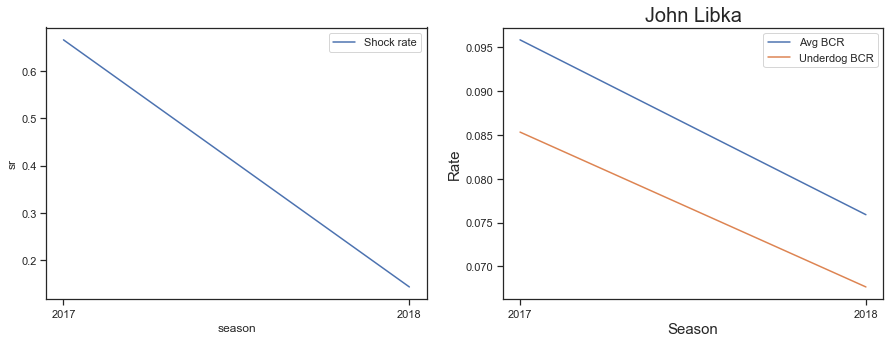

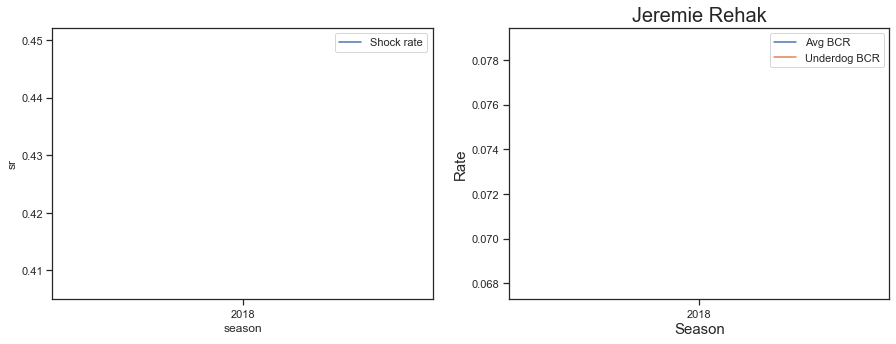

In [339]:
plot_ump(1,117)